# lab0

### 实验目标

1. 学习如何使用python环境执行图神经网络任务
2. 理解并实现简单的图卷积网络（GCN）
3. 练习如何使用PyTorch和PyTorch Geometric（PyG）库处理图数据

### 实验说明

1. 因为会安装pytorch以及别的库，推荐大家在自己的电脑上配置环境
2. 实验0旨在帮助大家熟悉实验环境，并不会打分，我们推荐大家多跑几次，可以尝试做附加内容
3. 做完实验后，请举手通知助教检查实验代码以及问题的输出结果，以便给同学们进行打分
4. 如果大家有疑问尽量在实验课的前60分钟提出，后30分钟主要用于检查同学们的实验结果，可能时间没那么充裕

### 参考文档：
此处给出官方文档，同样推荐同学们去别的平台如stackoverflow等搜索
1. NetworkX: https://networkx.org/documentation/stable/tutorial.html
2. PyG ：https://pytorch-geometric.readthedocs.io/en/latest/


# 熟悉NetworkX

NetworkX是最常用的Python包之一，用于创建、操作和挖掘图形

## 初始化

注意导入之前需要提前安装对应库（PyG和networkx）

### 图
1. NetworkX 提供了多个类来存储不同类型的图，例如有向图和无向图。它还提供了创建多重图（包括有向和无向图）的类。
2. 欲了解更多信息，请参阅 NetworkX 图类型。
   1. https://networkx.org/documentation/stable/reference/classes/index.html

In [3]:
# 导入所需的库
import networkx as nx

In [4]:
# 创建一个无向图 G
G = nx.Graph()
print(G.is_directed())

# 创建一个有向图 H
H = nx.DiGraph()
print(H.is_directed())

# 添加图级别的属性
G.graph["Name"] = "Bar"
print(G.graph)


False
True
{'Name': 'Bar'}


## 节点

节点（带属性）可以很容易地添加到NetworkX图中。

In [5]:
# 添加一个带节点级别属性的节点
G.add_node(0, feature=0, label=0)

# 获取节点 0 的属性
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))


Node 0 has the attributes {'feature': 0, 'label': 0}


In [6]:
# 添加多个带属性的节点
G.add_nodes_from([
    (1, {"feature": 1, "label": 1}),
    (2, {"feature": 2, "label": 2})
])

# 遍历所有节点
# 设置 data=True 将返回节点属性
for node in G.nodes(data=True):
    print(node)

# 获取节点数量
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## 边
类似节点，带有属性的边也可以加入NetworkX 图中

In [7]:
# 添加一条带有权重0.5的边
G.add_edge(0, 1, weight=1)

# 获取边 (0, 1) 的属性
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))


Edge (0, 1) has the attributes {'weight': 1}


In [8]:
# 添加多条带有权重的边
G.add_edges_from([
  (1, 2, {"weight": 2}),
  (2, 0, {"weight": 1.5})
])

# 遍历所有的边
# 这里没有设置 data=True，因此只会返回边
for edge in G.edges():
  print(edge)

# 获取边的数量
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))


(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## 可视化

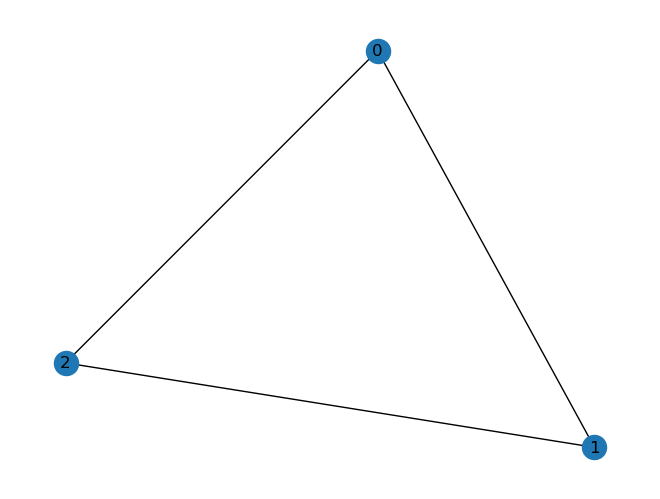

In [10]:
# 画图
nx.draw(G, with_labels = True)

## 节点度数与相邻点

In [11]:
node_id = 1

# 节点 1 的度数
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# 获取节点 1 的邻居
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))


Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## 其它功能

NetworkX 还提供了许多有用的方法来研究图形，如PageRank
PageRank 衡量图中每个节点的重要性或影响力。它基于一个简单的假设：一个节点（例如网页）越多地被其他重要节点（网页）链接，它就越重要。

文档：https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

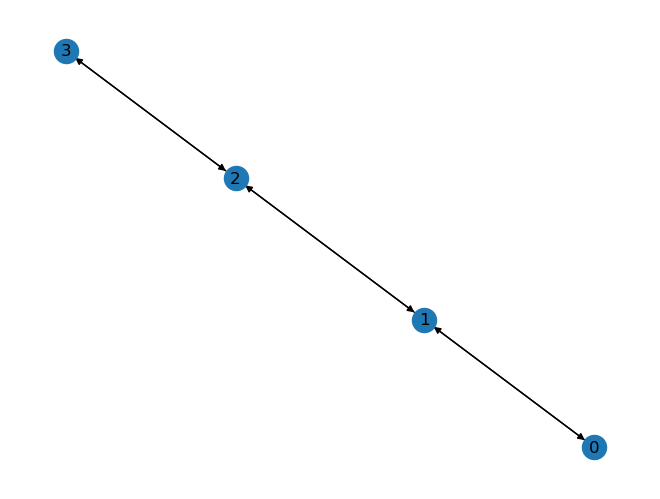

In [13]:
num_nodes = 4
# 创建一个新的路径图并将其转换为有向图
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels=True)

# 获取 PageRank
pr = nx.pagerank(G, alpha=0.8)
pr


# PyTorch Geometric (PyG)

PyTorch Geometric (PyG) 是一个扩展库，用于 PyTorch。它提供了许多有用的基础组件，用于开发图深度学习模型，包括各种图神经网络层和大量的基准数据集。

文档：https://pytorch-geometric.readthedocs.io/en/latest/

## 初始化

首先安装pytorch（如果安装了的同学请跳过这一步）
通过如下命令来安装
如果出现问题检查报错，可能因为pip版本不足

注意！！！
pytorch仅仅支持python3.9-3.12的版本（windows）
详情看https://pytorch.org/get-started/locally/


In [23]:
# %pip install torch

In [15]:
import torch
x = torch.tensor([1, 2, 3])

In [16]:
import torch
print("PyTorch has version {}".format(torch.version.__version__))
print(f"CUDA version: {torch.version.cuda}")
# 检查是否有 CUDA 支持
print(torch.Tensor([1,2,3]))  # 检查 Tensor 是否正常导入
print(torch.__version__)

PyTorch has version 2.7.0+cpu
CUDA version: None
tensor([1., 2., 3.])
2.7.0+cpu


具体下载的版本请参考：
https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html

# 可视化

In [17]:
# 可视化的辅助函数。
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# 用于可视化NX图或PyTorch张量的函数
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()


# 介绍

本教程将通过基于[**PyTorch Geometric (PyG)库**](https://github.com/pyg-team/pytorch_geometric)的图神经网络介绍一些深度学习在图上的基本概念。PyTorch Geometric是流行的深度学习框架PyTorch的扩展库，包含了各种方法和工具，能够简化图神经网络的实现

[Zachary的空手道俱乐部网络](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)——深入了解图神经网络。这个图描述了一个由34名空手道俱乐部成员组成的社交网络，并记录了在俱乐部外互动的成员之间的连接。我们在这里关注的是通过成员间的互动，检测出社交网络中出现的社区。

# 数据集

PyTorch Geometric通过torch_geometric.datasets子包提供了对数据集相关操作

参考文档：https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets

In [19]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


在初始化 [KarateClub](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) 数据集后，我们首先可以检查它的一些属性。例如，我们可以看到这个数据集只包含一个图，并且该数据集中的每个节点都被分配了一个34维的特征向量（这个特征向量唯一地描述了空手道俱乐部的成员）。此外，图中有4个类别，每个类别代表一个节点所属的社区。

接下来，让我们更详细地看看底层的图：

In [21]:
data = dataset[0]  # 获取第一个图对象。

print(data)
print('==============================================================')

# 收集一些关于图的统计信息。
print(f'节点数量: {data.num_nodes}')
print(f'边数量: {data.num_edges}')
print(f'平均节点度: {data.num_edges / data.num_nodes:.2f}')
print(f'训练节点数量: {data.train_mask.sum()}')
print(f'训练节点标签比例: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'是否包含孤立节点: {data.contains_isolated_nodes()}')
print(f'是否包含自环: {data.contains_self_loops()}')
print(f'是否是无向图: {data.is_undirected()}')


Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
节点数量: 34
边数量: 156
平均节点度: 4.59
训练节点数量: 4
训练节点标签比例: 0.12
是否包含孤立节点: False
是否包含自环: False
是否是无向图: True


# 数据
在 PyTorch Geometric 中，每个图都由一个单独的 Data 对象表示，该对象包含描述图表示的所有信息。我们可以随时通过 print(data) 打印数据对象，查看其属性及其形状的简要摘要：
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```

我们可以看到，这个 data 对象包含了4个属性： (1) edge_index 属性包含了 图的连通性 信息，即每条边的源节点和目标节点的索引元组。 PyG 进一步将 (2) 节点特征 称为 x（每个34个节点都有一个34维的特征向量），并将 (3) 节点标签 称为 y（每个节点都被分配到一个类别）。 (4) 还有一个额外的属性叫做 train_mask，它描述了我们已经知道哪些节点的社区分配。总的来说，我们只知道4个节点的真实标签（每个社区一个节点），任务是推断其余节点的社区分配。

data 对象还提供了一些 实用函数，可以推断底层图的一些基本属性。例如，我们可以轻松地推断图中是否存在孤立节点（即不存在任何连接到其他节点的边），图中是否包含自环（即，$(v, v) \in \mathcal{E}$），或者图是否是无向图（即，对于每条边 $(v, w) \in \mathcal{E}$，是否也存在边 $(w, v) \in \mathcal{E}$）。

In [22]:
from IPython.display import Javascript  # 限制输出单元格的高度。
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())


<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

# 边索引（Edge Index）
通过打印 edge_index，我们可以进一步理解 PyG 如何在内部表示图的连通性。我们可以看到，对于每条边，edge_index 保存了一对节点索引元组，其中第一个值描述了源节点的索引，第二个值描述了边的目标节点的索引。

这种表示方法被称为 COO 格式（坐标格式），通常用于表示稀疏矩阵。与其将邻接信息以稠密表示 $\mathbf{A} \in { 0, 1 }^{|\mathcal{V}| \times |\mathcal{V}|}$ 存储，PyG 采用稀疏表示图，这意味着只存储那些在 $\mathbf{A}$ 中非零的条目的坐标/值。

我们可以通过将图转换为 networkx 库的格式来进一步可视化图，该库除了图的操作功能外，还提供了强大的可视化工具：

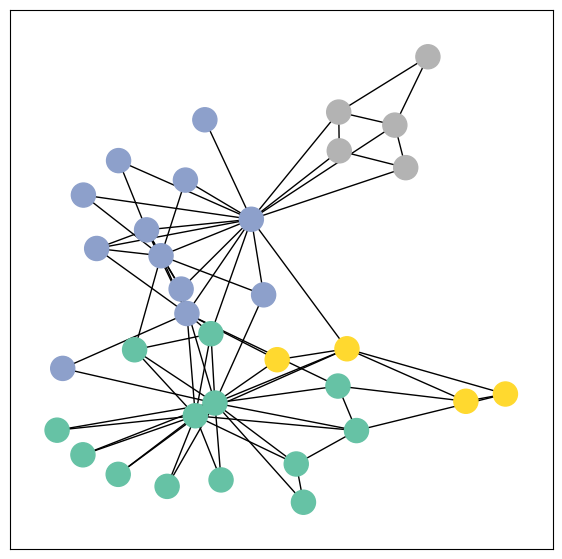

In [23]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

# 实现图神经网络
在了解了 PyG 的数据处理后，接下来是实现我们的第一个图神经网络！

为此，我们将使用最简单的 GNN 操作之一——GCN 层([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907))。

PyG 通过 [GCNConv]((https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv)) 实现了这一层，可以通过传入节点特征表示 x 和 COO 图连接表示 edge_index 来执行。

有了这些，我们就可以通过在 torch.nn.Module 类中定义网络架构，来创建我们的第一个图神经网络

In [24]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)  # 设置随机种子，确保结果可重复
        self.conv1 = GCNConv(dataset.num_features, 4)  # 第一层 GCN，输入特征维度为 dataset.num_features，输出维度为 4
        self.conv2 = GCNConv(4, 4)  # 第二层 GCN，输入输出维度均为 4
        self.conv3 = GCNConv(4, 2)  # 第三层 GCN，输入维度为 4，输出维度为 2
        self.classifier = Linear(2, dataset.num_classes)  # 最后的线性分类器，输入维度为 2，输出为类别数

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)  # 第一层 GCN 计算
        h = h.tanh()  # 激活函数，tanh
        h = self.conv2(h, edge_index)  # 第二层 GCN 计算
        h = h.tanh()  # 激活函数，tanh
        h = self.conv3(h, edge_index)  # 第三层 GCN 计算
        h = h.tanh()  # 最终的 GNN 嵌入空间

        # 应用最终的线性分类器进行分类
        out = self.classifier(h)

        return out, h  # 返回分类结果和节点的嵌入表示

model = GCN()  # 创建 GCN 模型实例
print(model)  # 打印模型结构


GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


在这里，我们首先在 __init__ 中初始化所有构建模块，并在 forward 中定义我们网络的计算流程。 我们首先定义并堆叠了 三个图卷积层，这对应于聚合每个节点周围 3 跳（hop）邻居的信息（即所有距离节点最多 3 "跳"的节点）。 此外，GCNConv 层将节点特征的维度降低到 $2$，即 $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$。每个 GCNConv 层都通过一个 tanh 非线性激活函数进行增强。

之后，我们应用一个线性变换（torch.nn.Linear），它作为分类器将节点映射到 4 个类别/社区中的一个。

我们返回最终分类器的输出以及由 GNN 生成的最终节点嵌入。 我们通过 GCN() 初始化我们的最终模型，打印模型时会输出它使用的所有子模块的摘要。

Embedding shape: [34, 2]


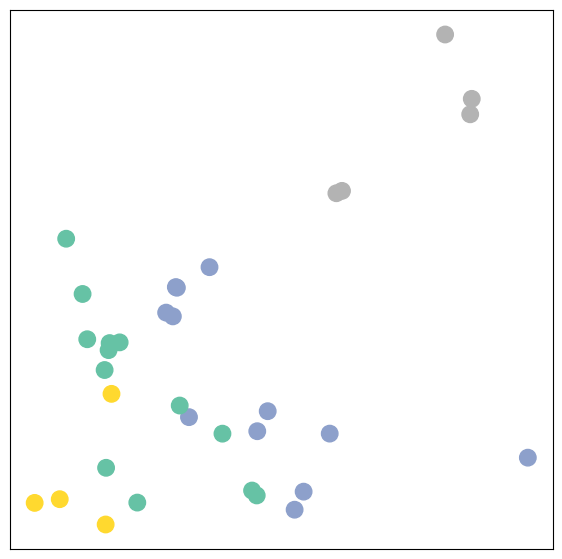

In [25]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

值得注意的是，即使在没有训练模型权重的情况下，模型已经能够生成与图的社区结构密切相关的节点嵌入。相同颜色（社区）的节点已经在嵌入空间中紧密地聚集在一起，尽管我们的模型权重完全是随机初始化的，并且我们至今尚未进行任何训练！这表明，图神经网络（GNN）引入了强烈的归纳偏置，使得在输入图中彼此接近的节点具有相似的嵌入表示。

在空手道俱乐部网络上训练
那么我们能做得更好吗？让我们看一个例子，演示如何根据图中4个节点（每个社区一个节点）的社区分配知识来训练我们的网络参数：

由于我们模型中的所有部分都是可微且有参数的，我们可以添加一些标签，训练模型并观察嵌入如何变化。在这里，我们使用半监督或传导学习过程：我们只对每个类别的一个节点进行训练，但可以使用完整的输入图数据。

训练我们的模型与训练其他 PyTorch 模型非常相似。除了定义网络架构外，我们还需要定义一个损失函数（这里使用 CrossEntropyLoss），并初始化一个随机梯度优化器（这里使用 Adam）。之后，我们进行多轮优化，每轮包括一次前向和一次反向传播，以计算模型参数相对于前向传播中衍生出的损失的梯度。如果你对 PyTorch 不陌生，这种流程应该是很熟悉的。否则，[PyTorch 文档](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer)提供了关于如何在 PyTorch 中训练神经网络的一个很好的介绍。

请注意，我们的半监督学习场景是通过以下这行代码实现的：

```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```

虽然我们计算了所有节点的嵌入，但我们仅使用训练节点来计算损失。在这里，这是通过筛选分类器输出 out 和真实标签 data.y，仅包含 train_mask 中的节点来实现的。

现在让我们开始训练，并观察我们的节点嵌入如何随着时间的推移发展（最好通过实际运行代码来体验）：

<IPython.core.display.Javascript object>

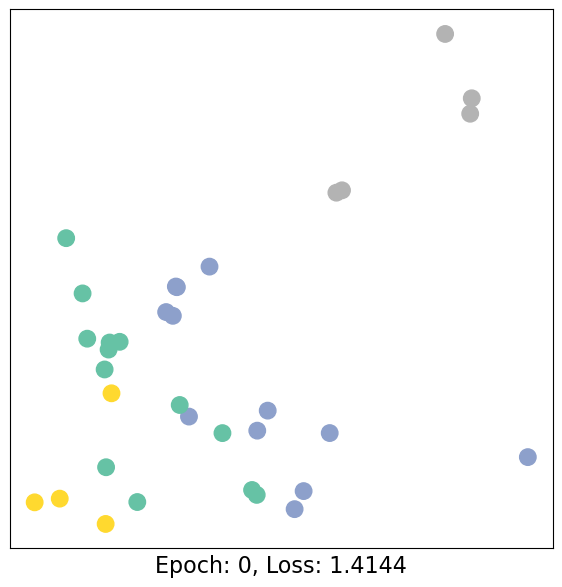

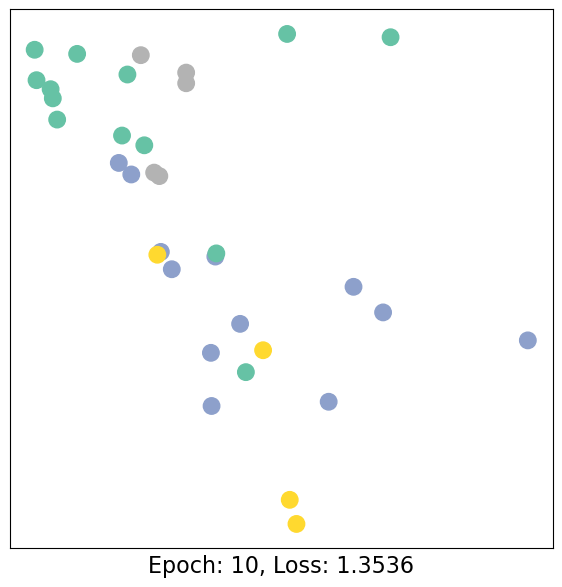

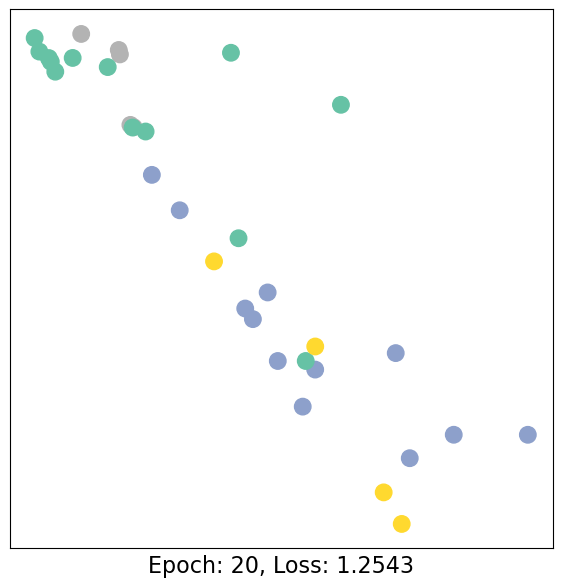

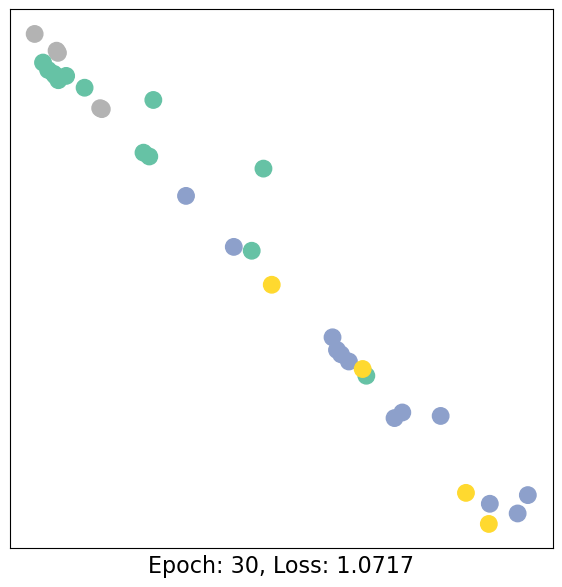

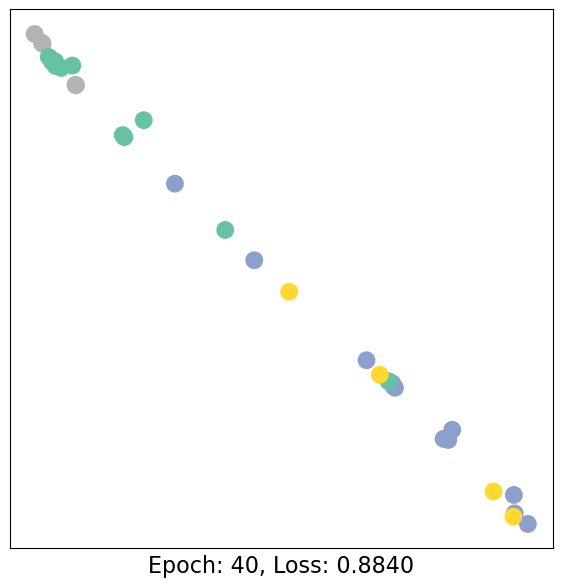

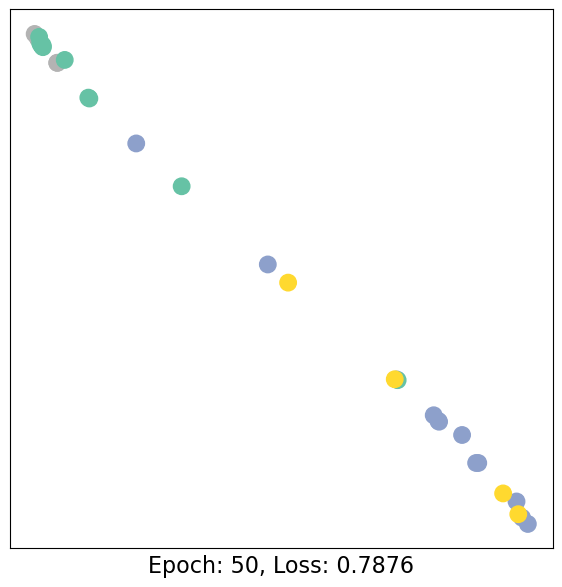

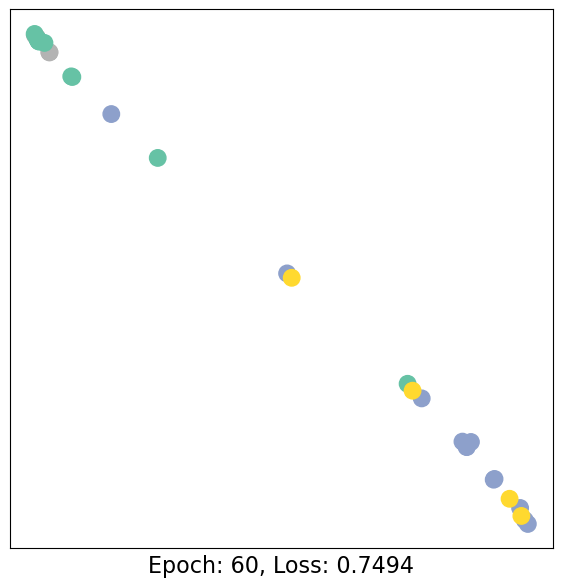

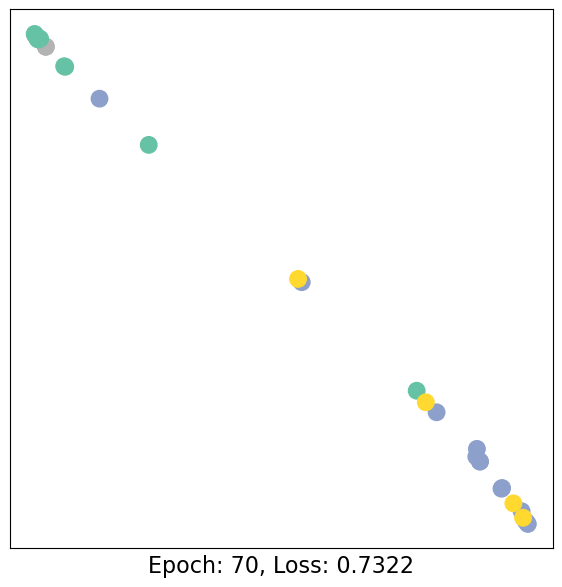

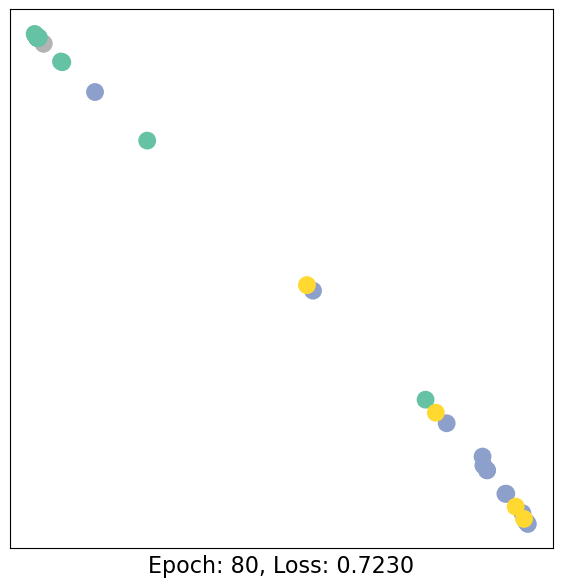

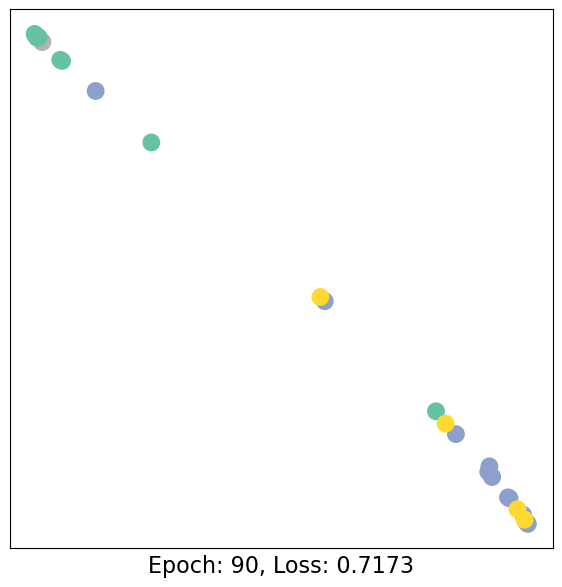

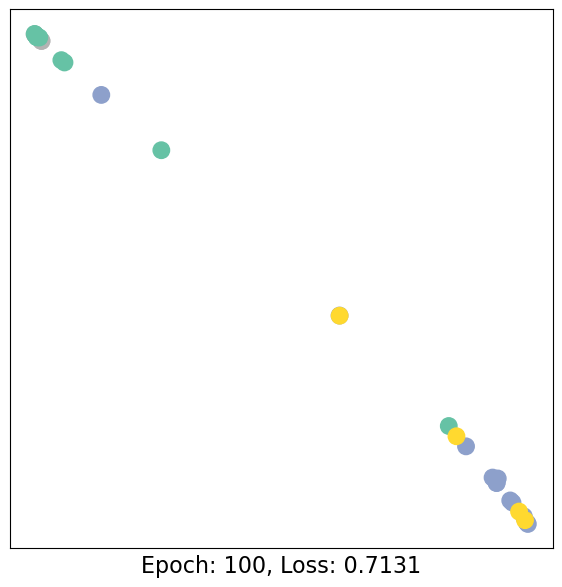

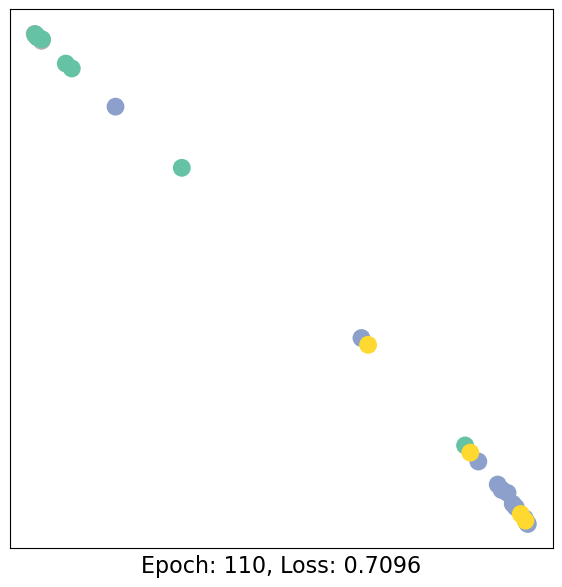

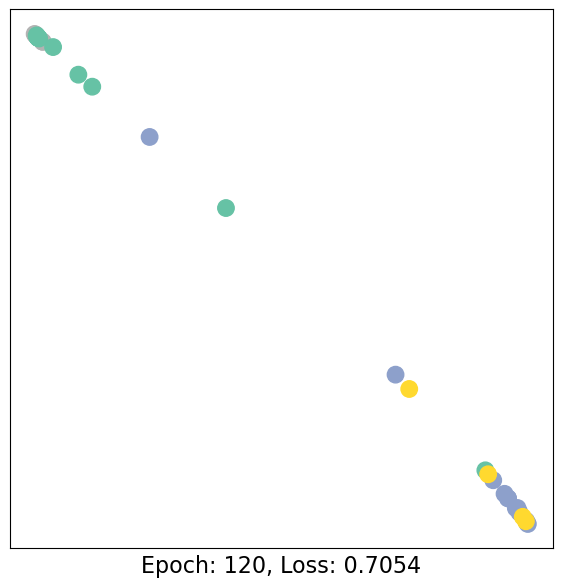

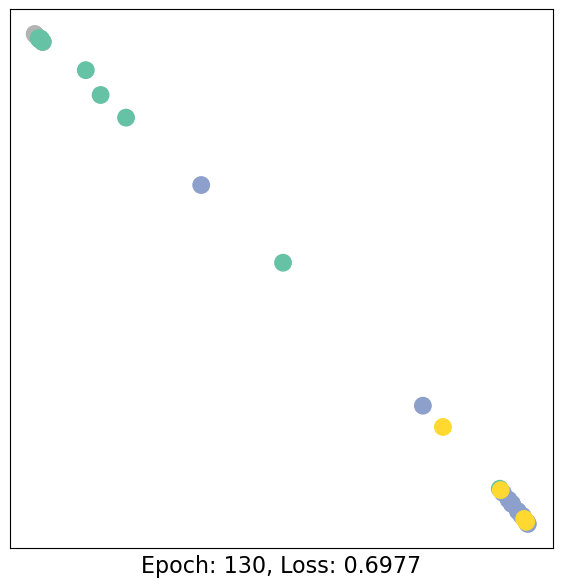

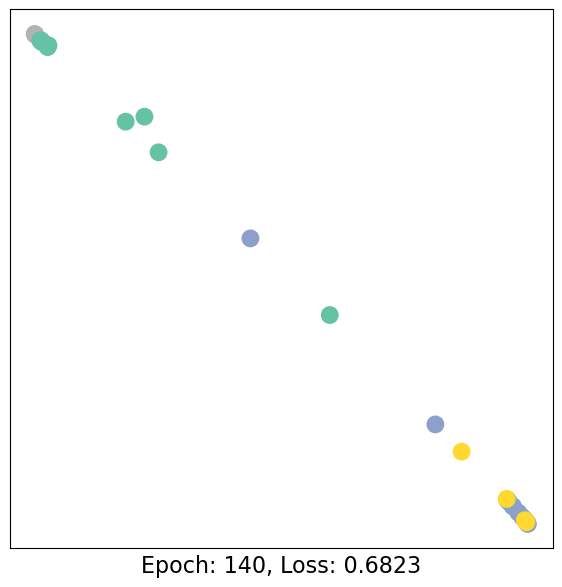

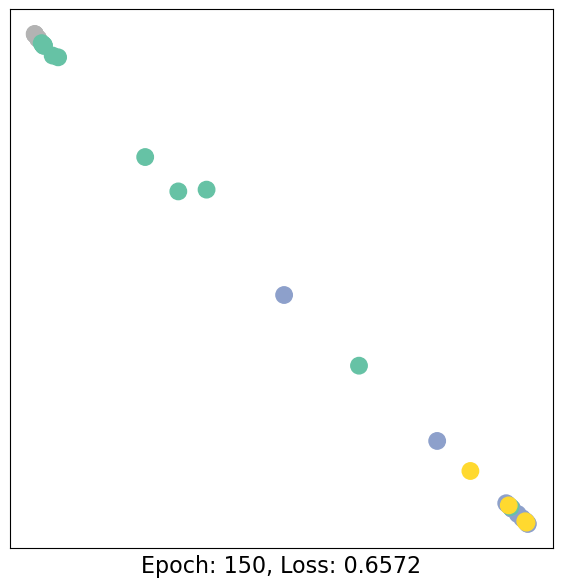

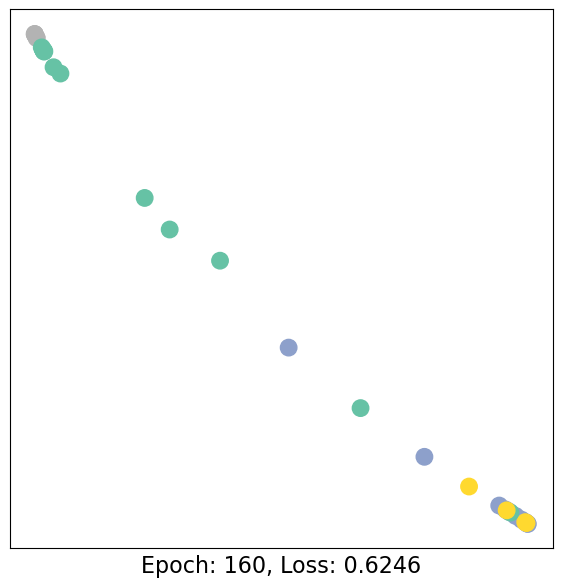

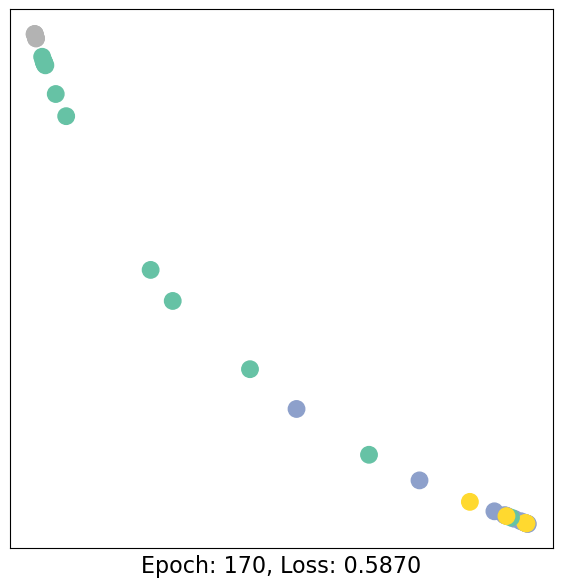

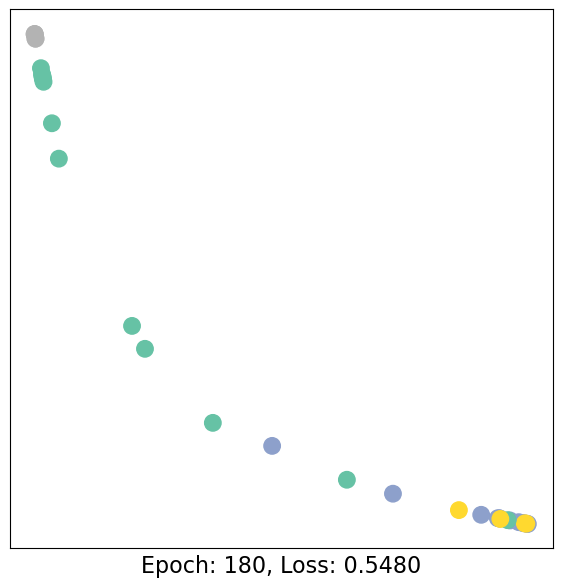

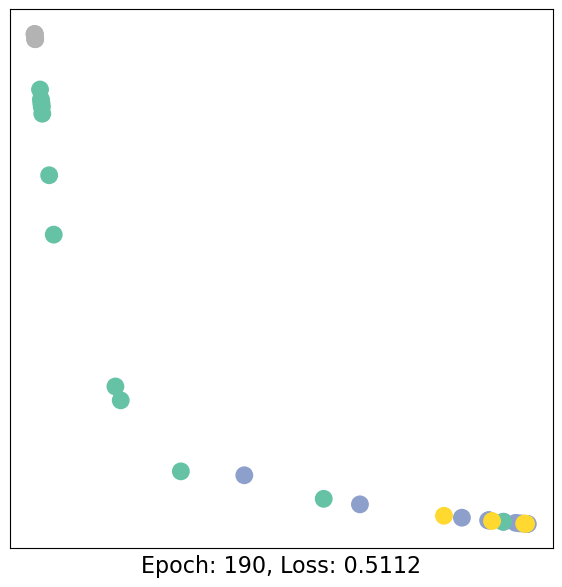

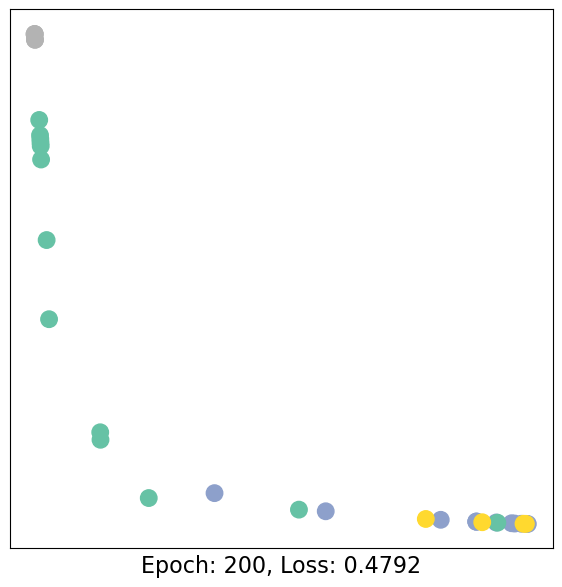

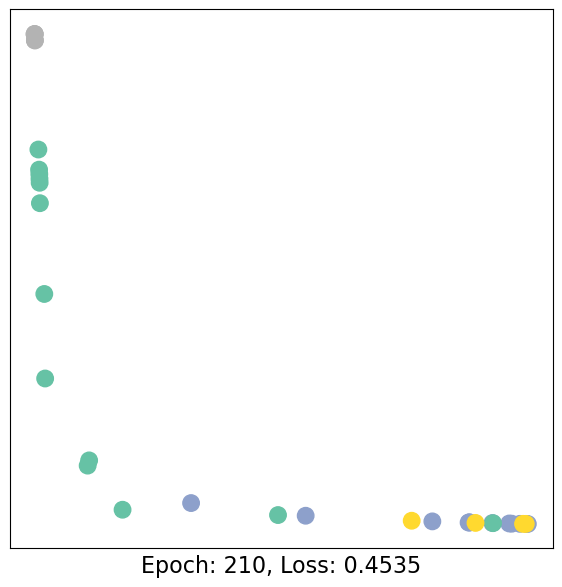

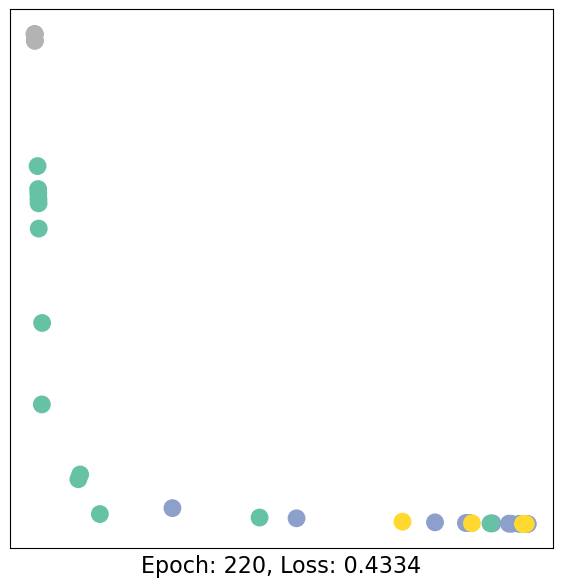

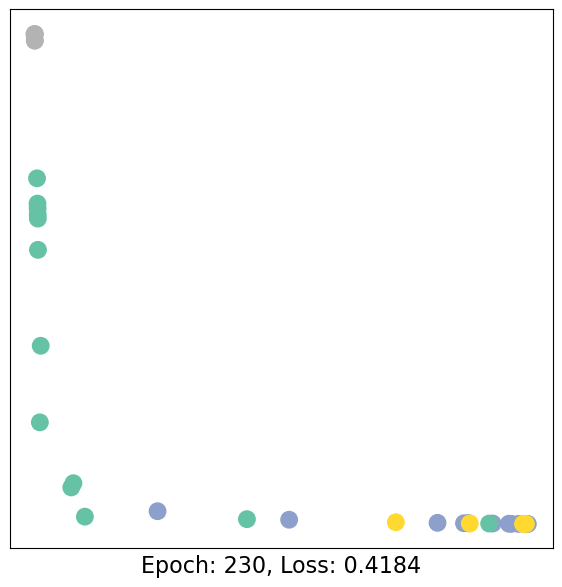

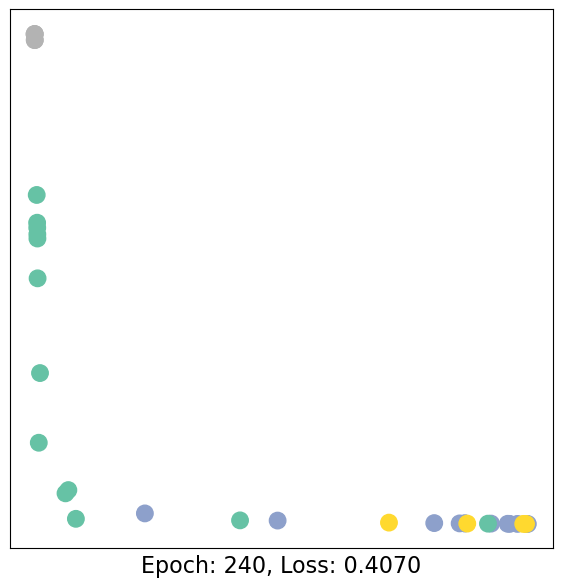

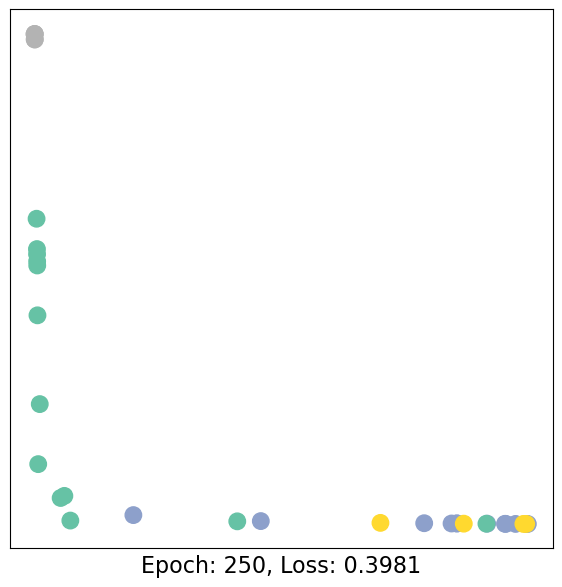

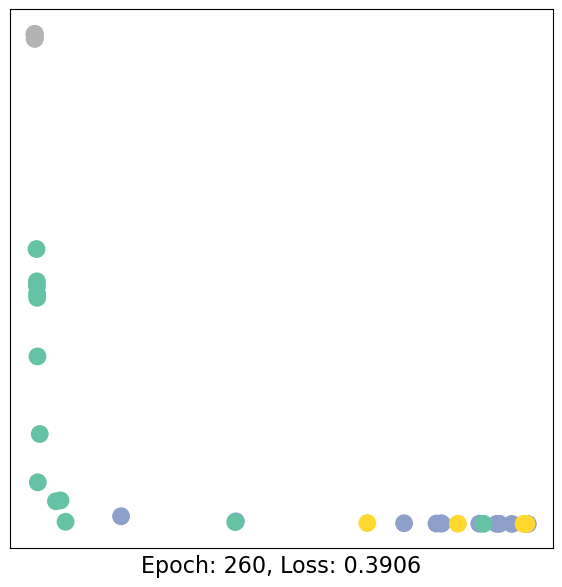

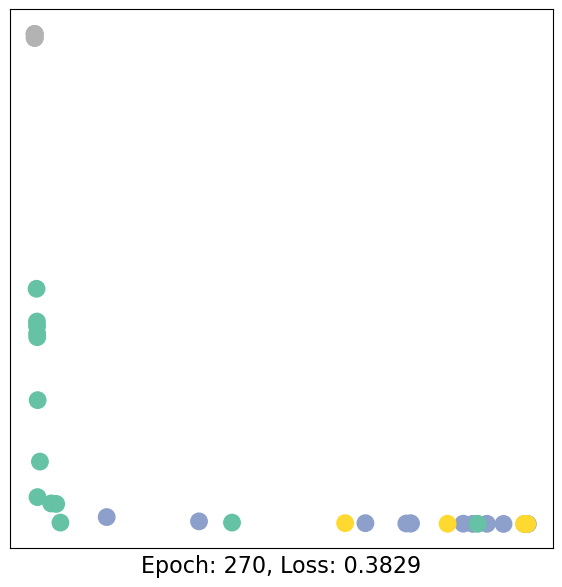

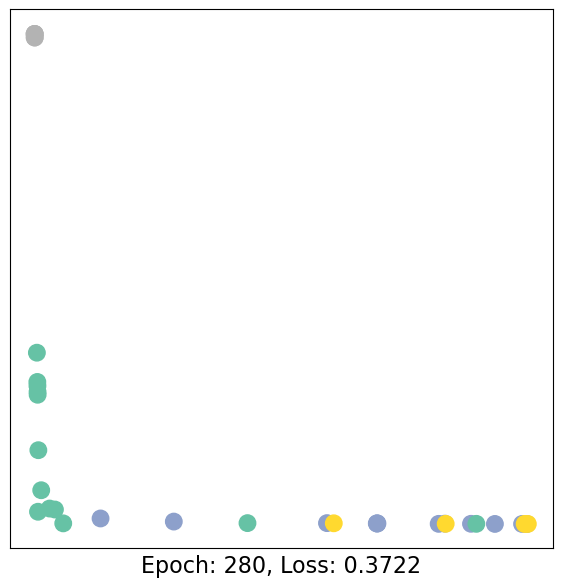

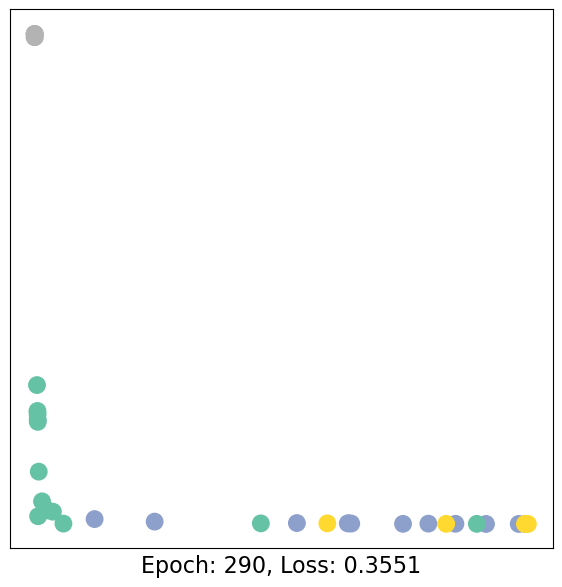

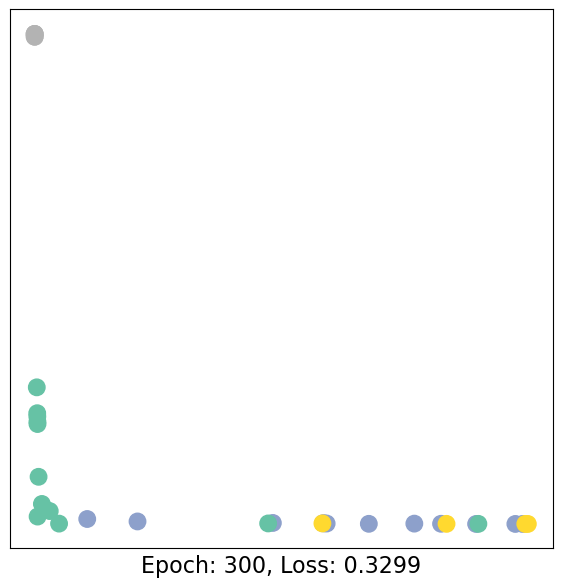

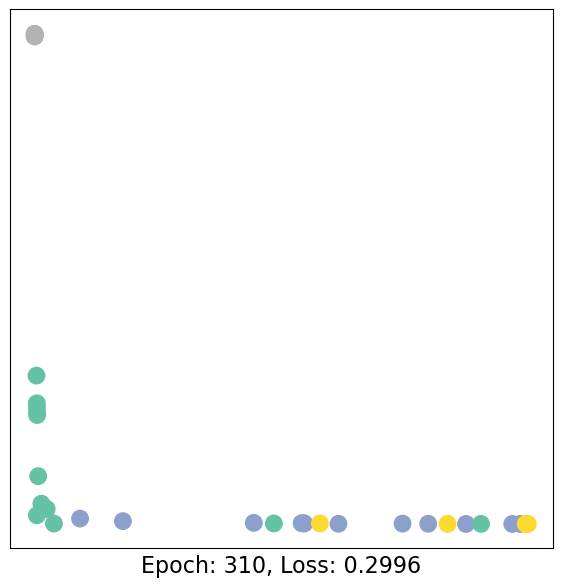

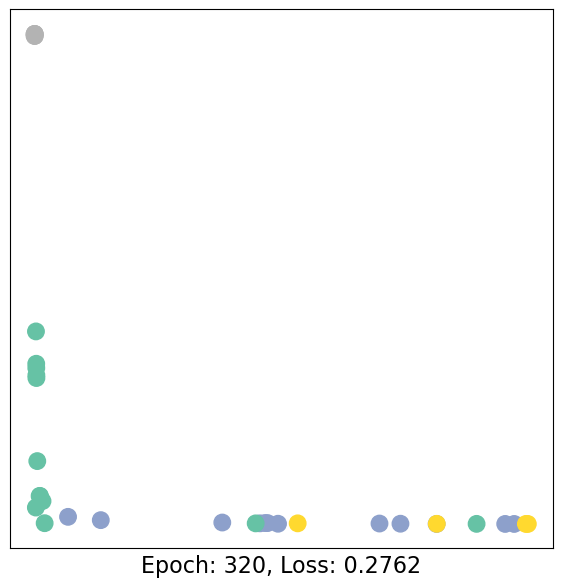

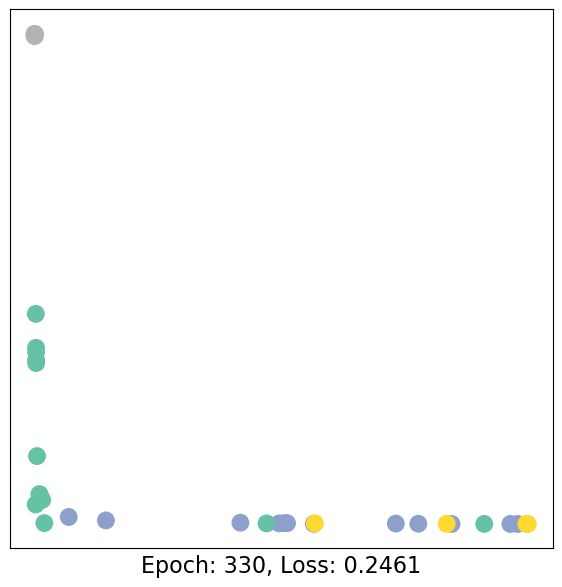

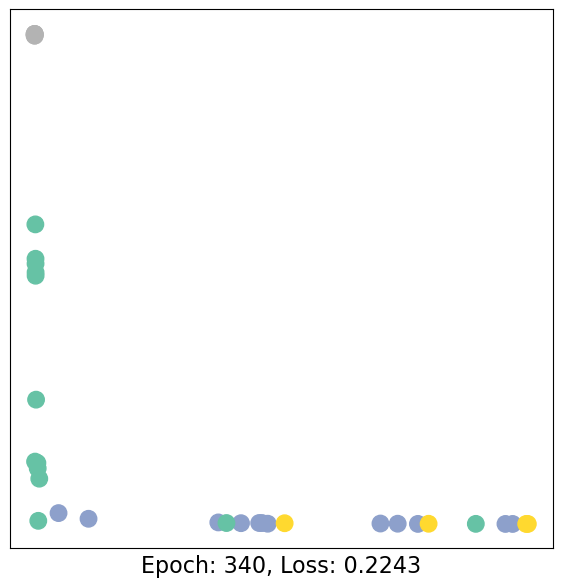

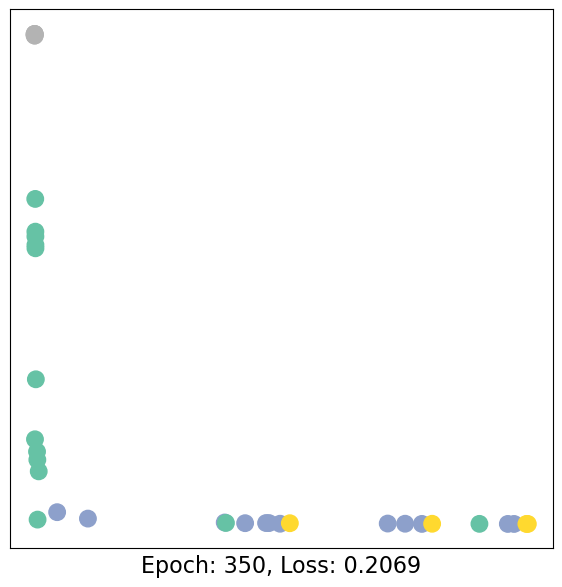

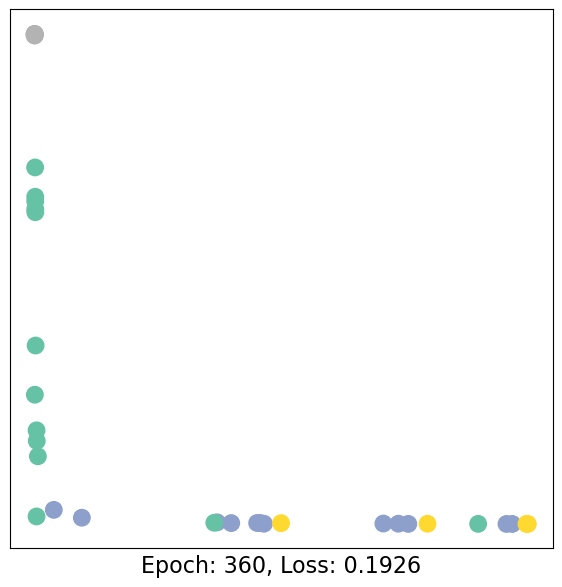

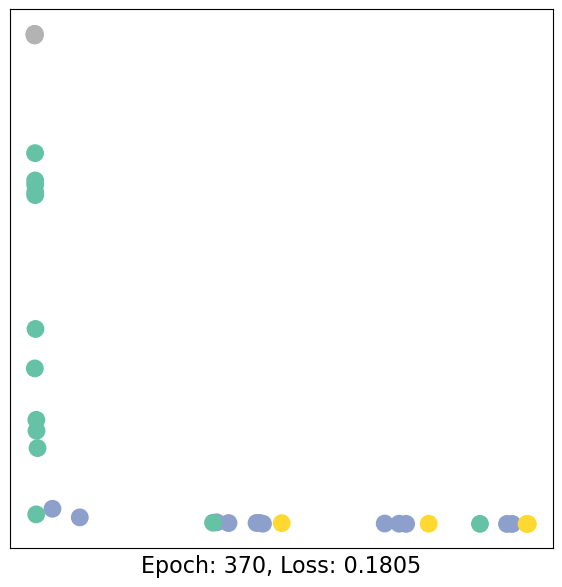

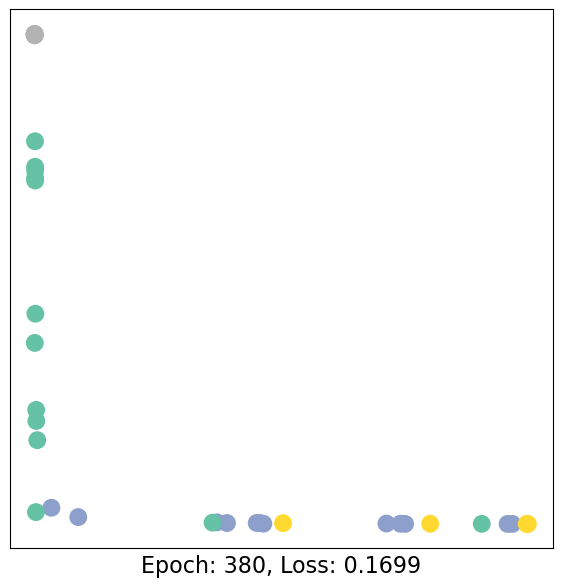

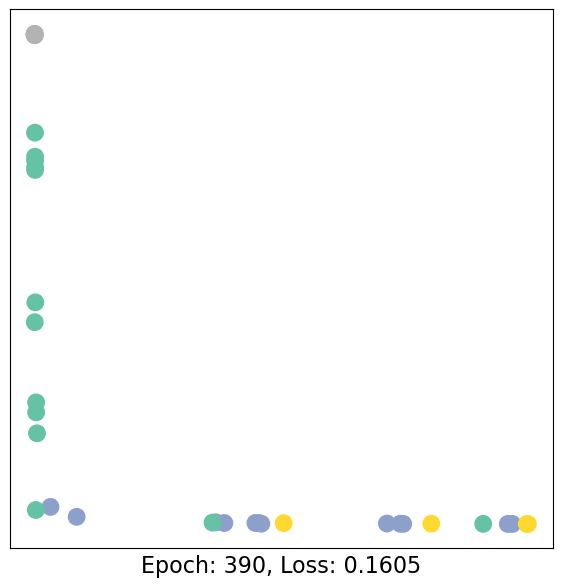

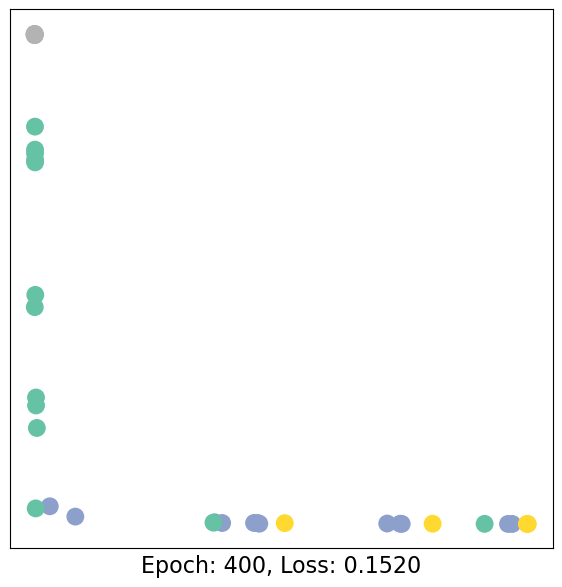

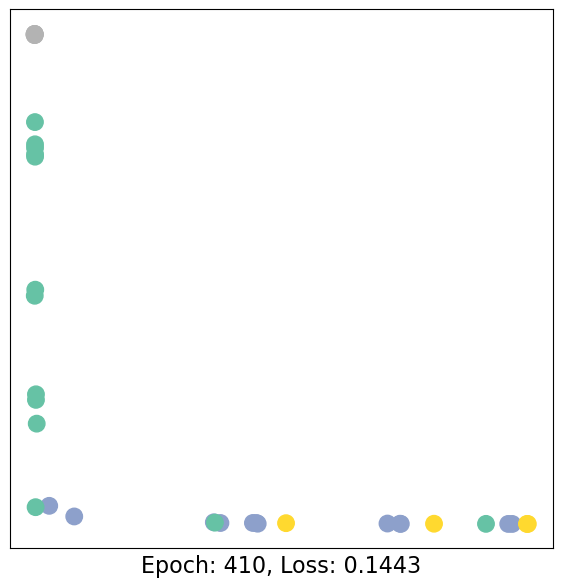

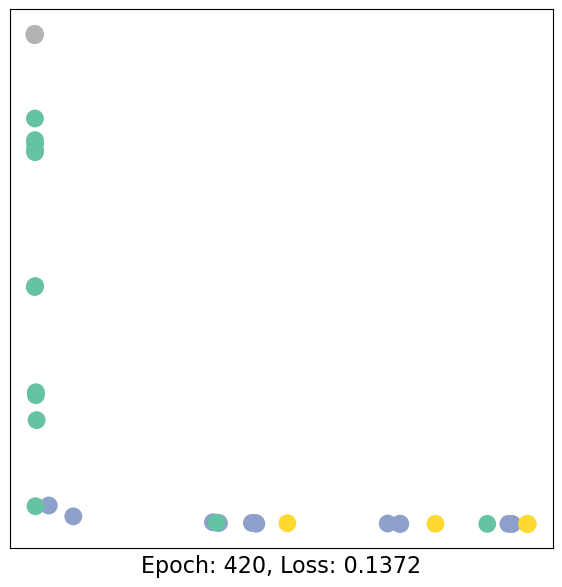

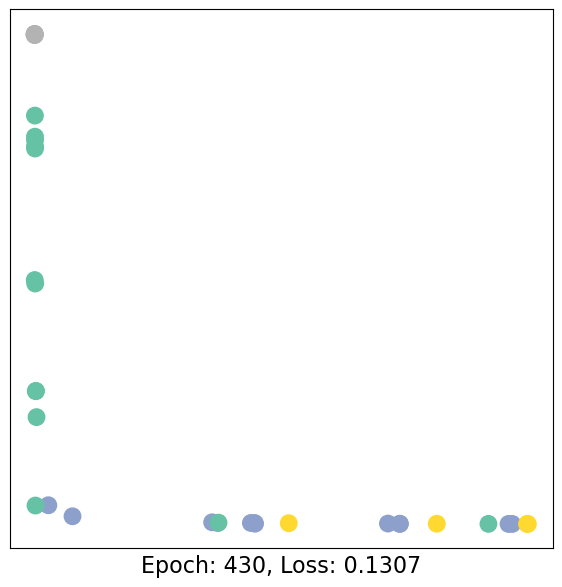

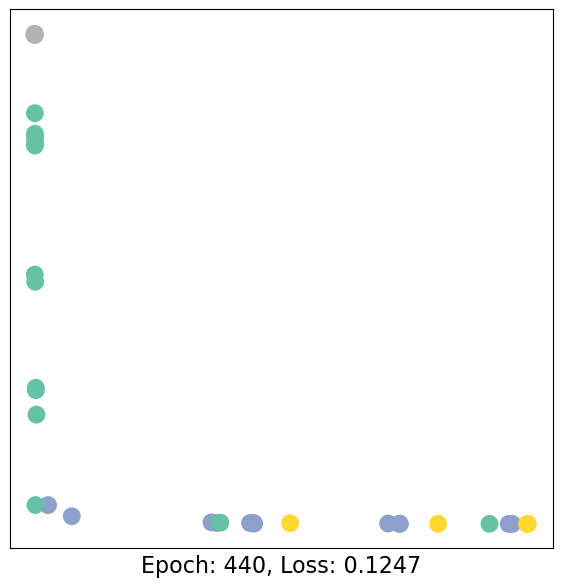

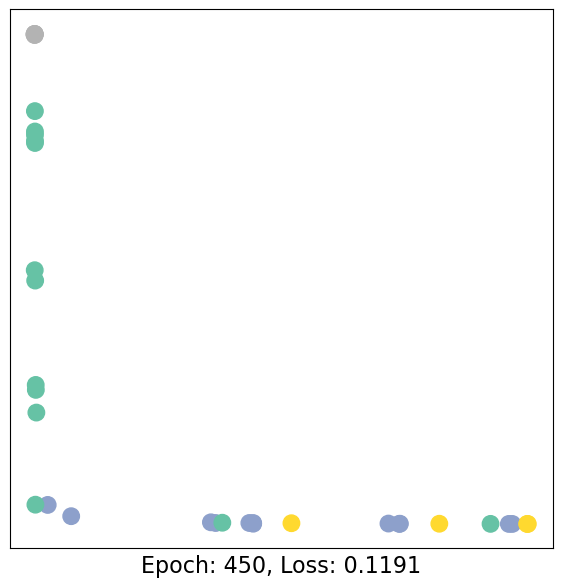

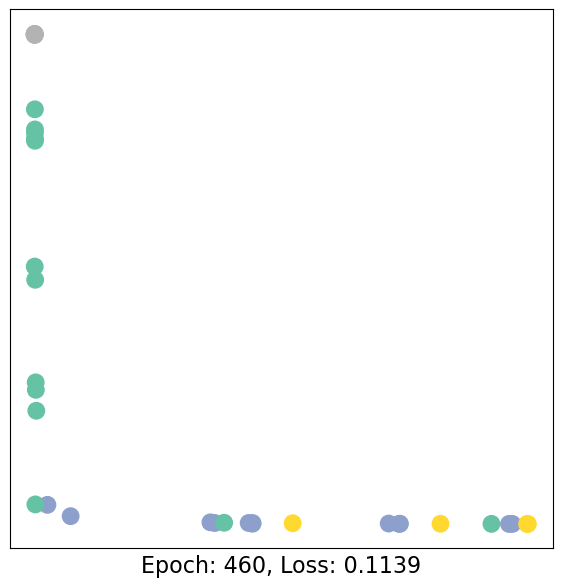

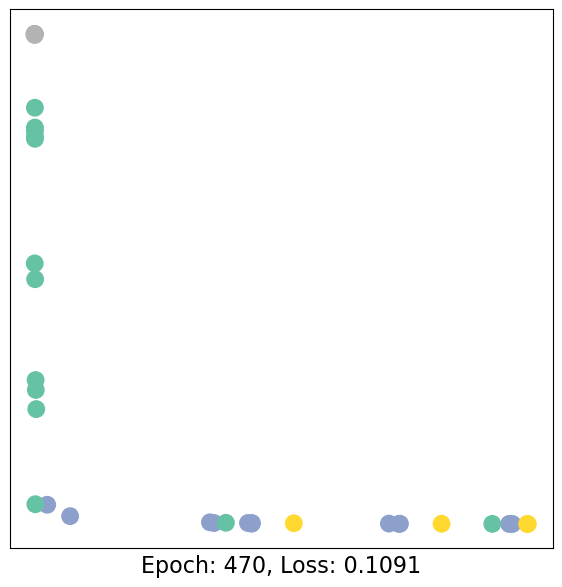

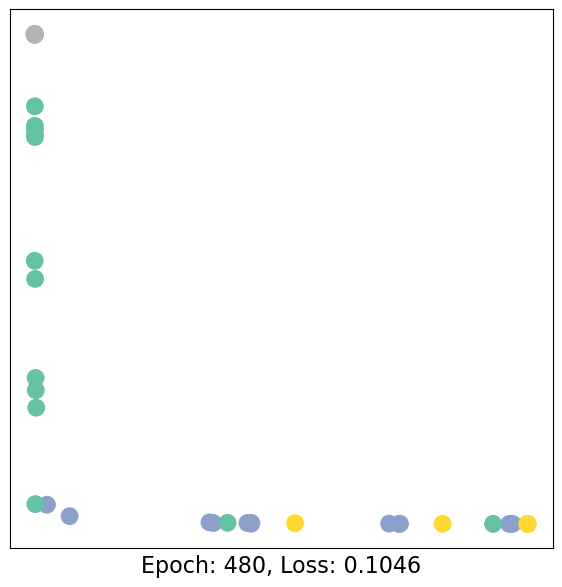

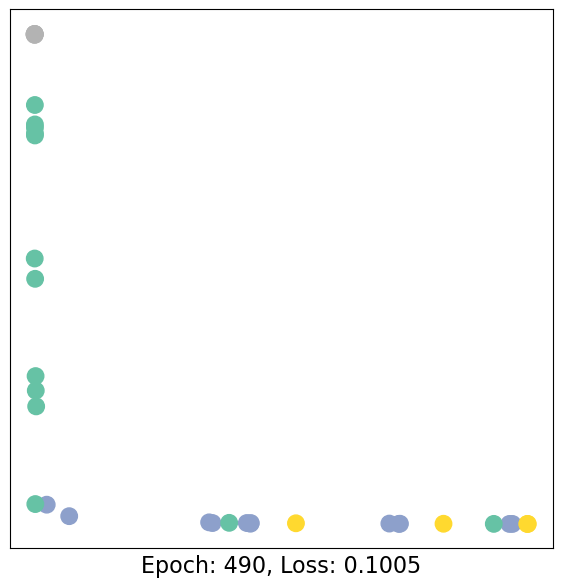

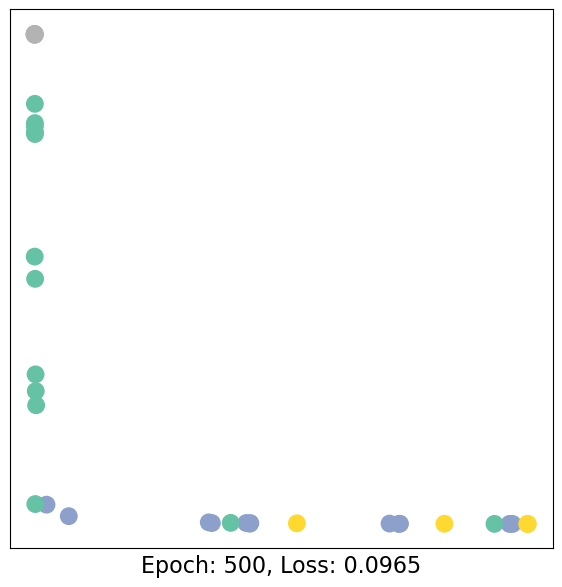

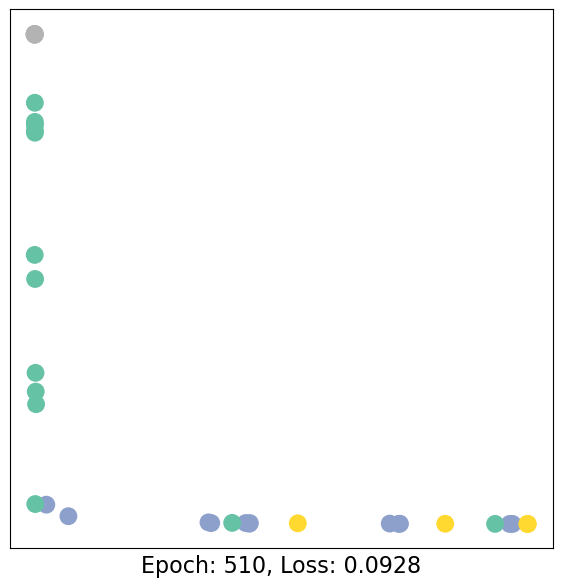

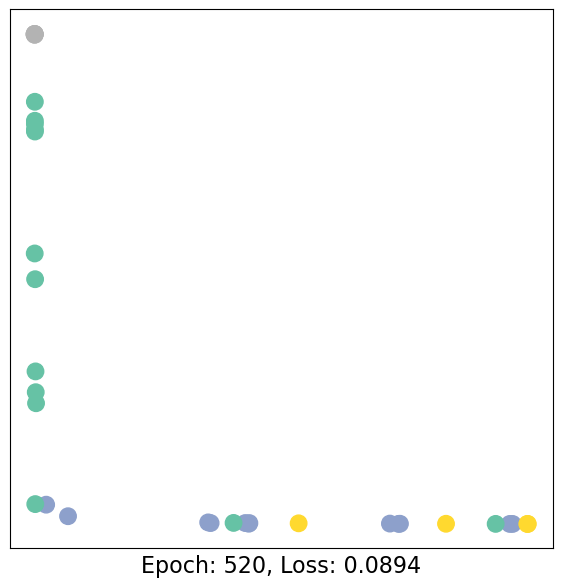

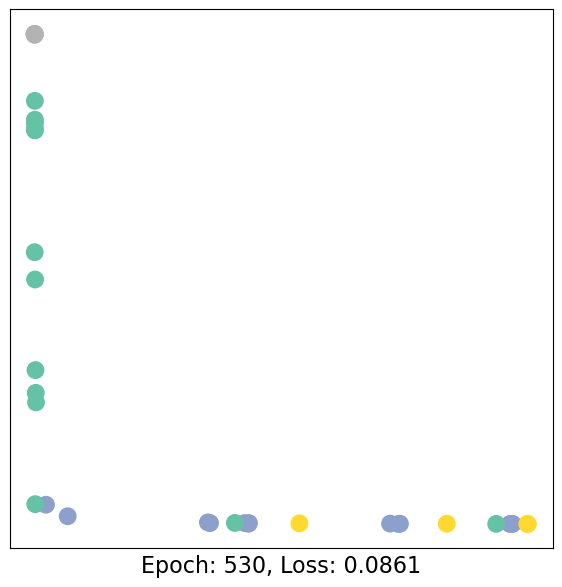

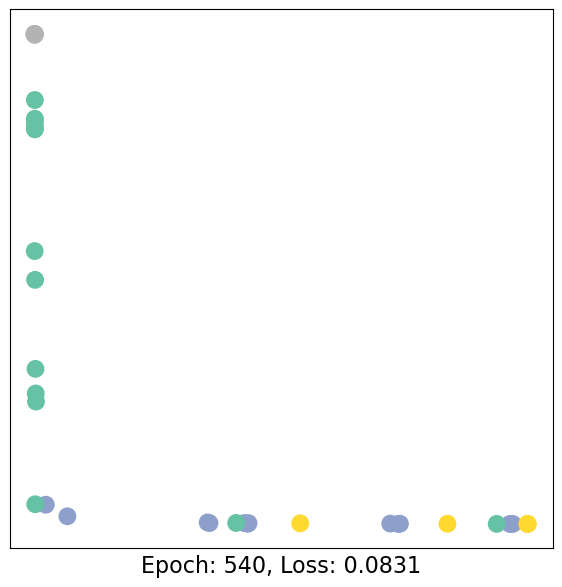

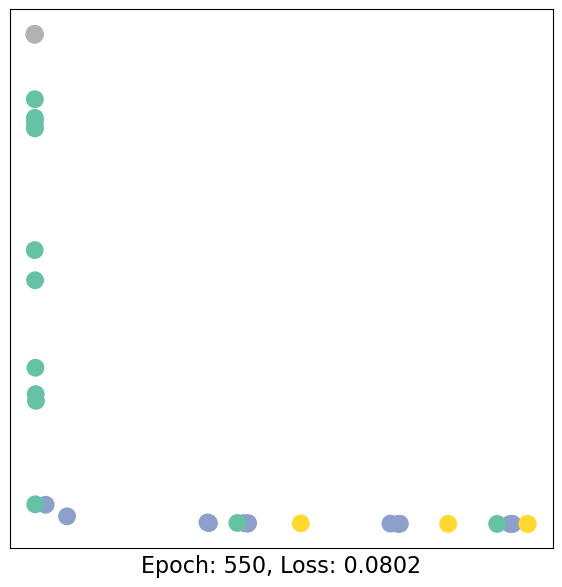

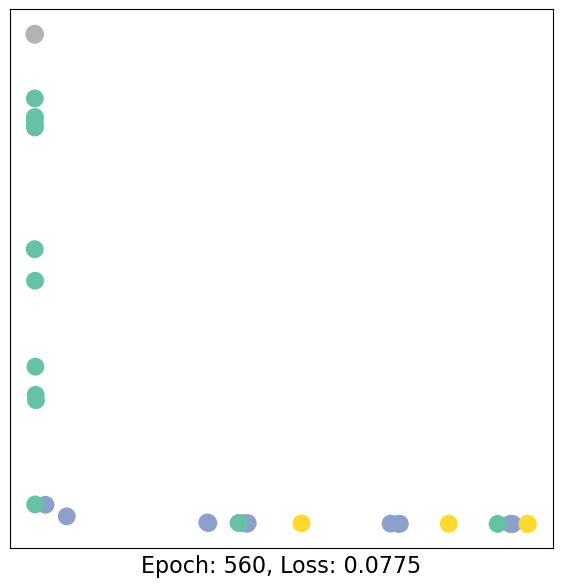

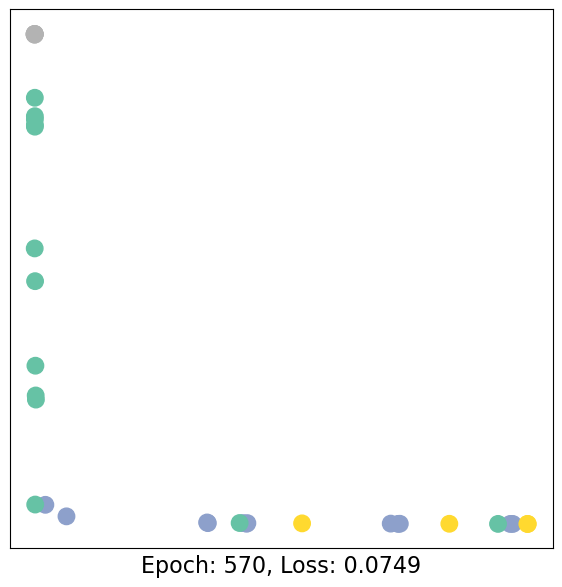

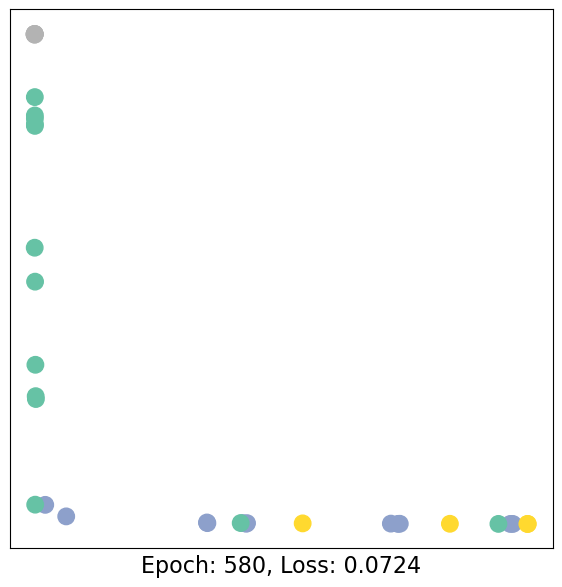

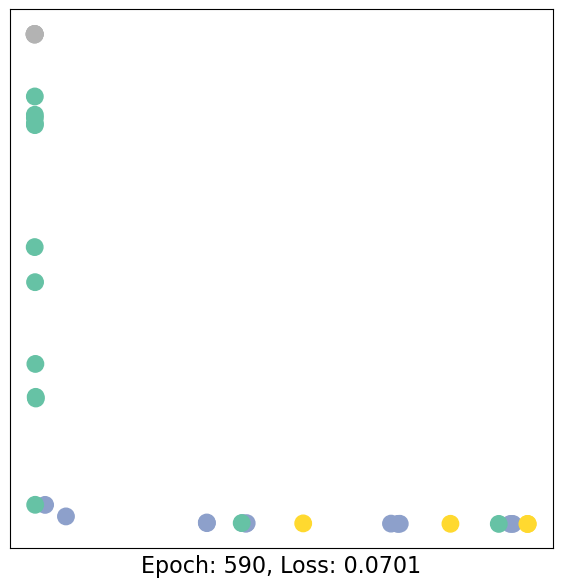

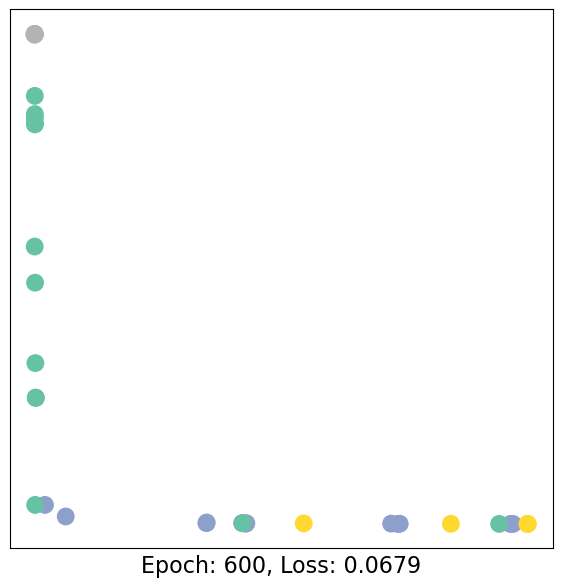

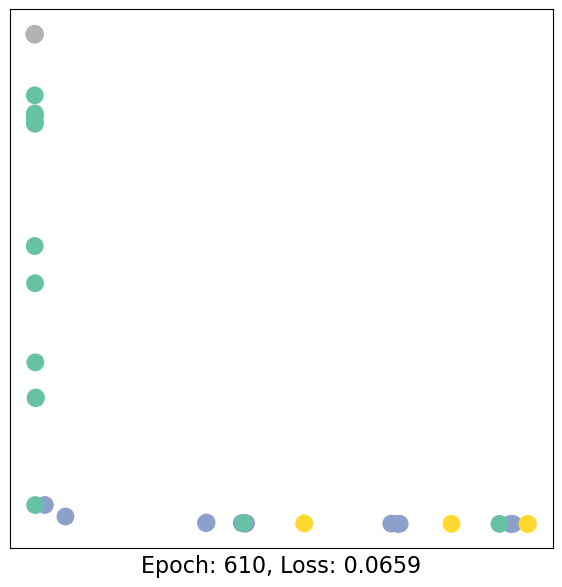

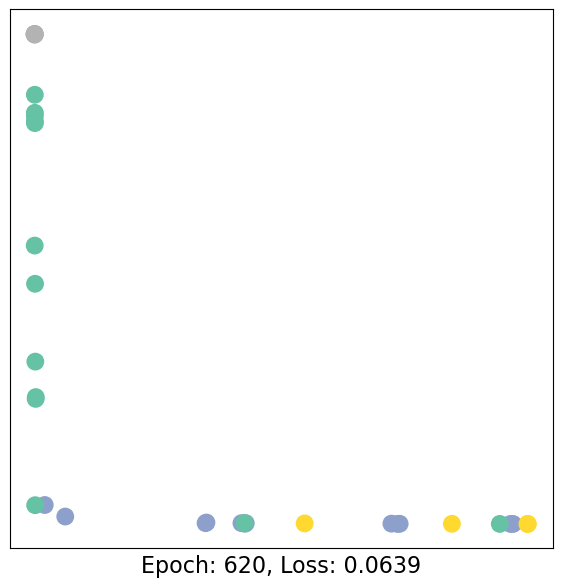

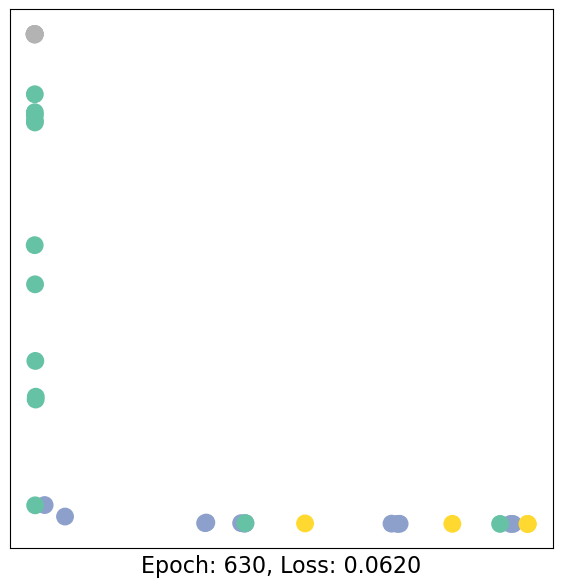

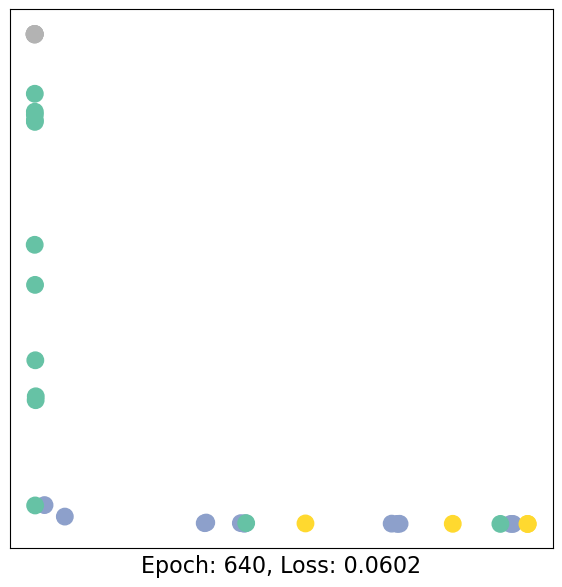

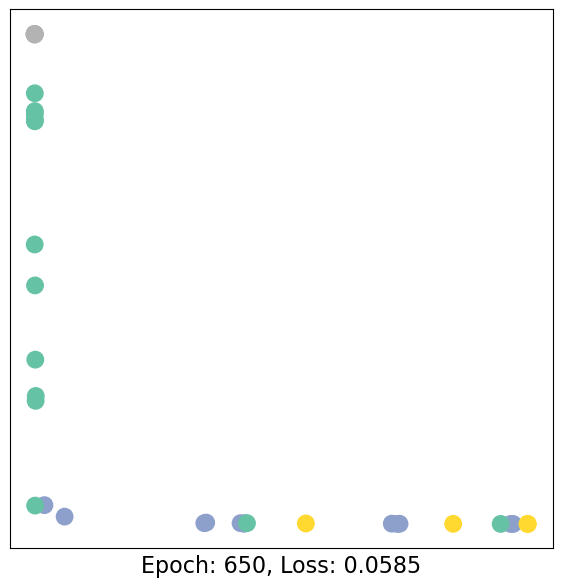

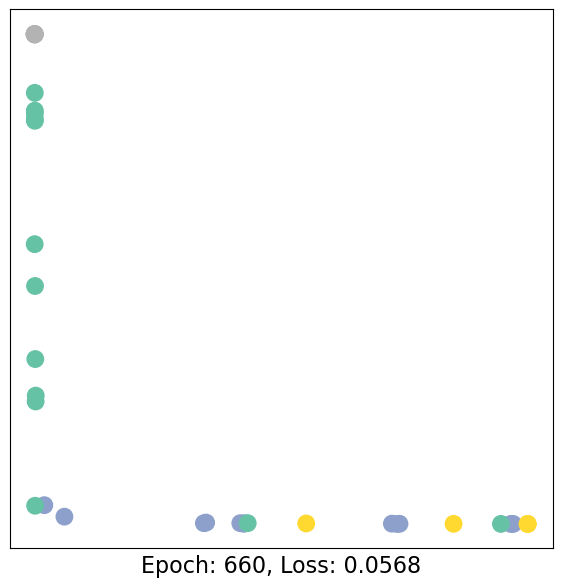

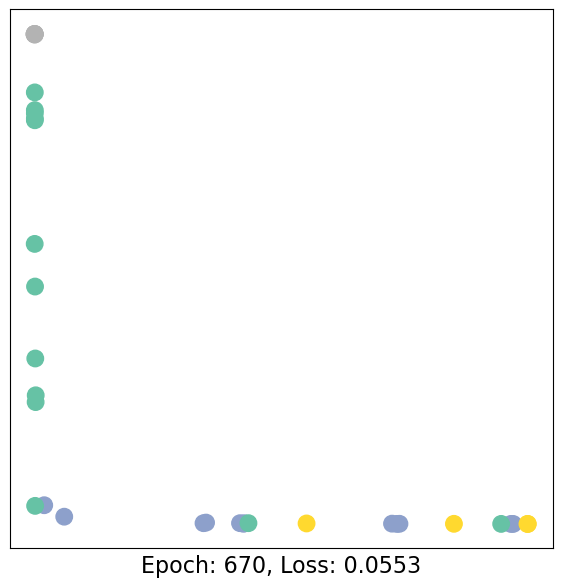

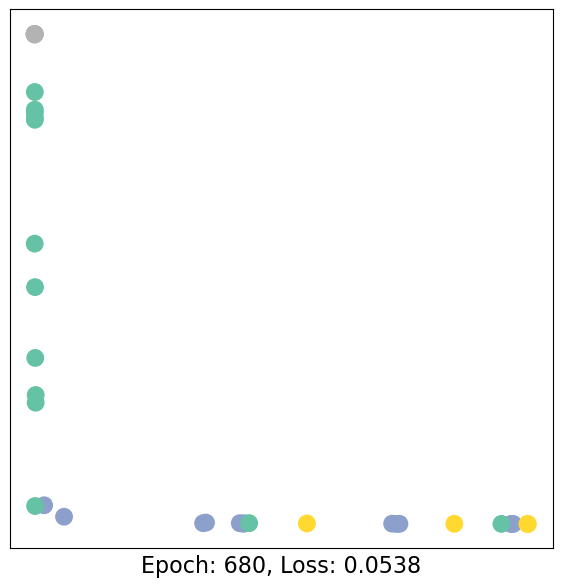

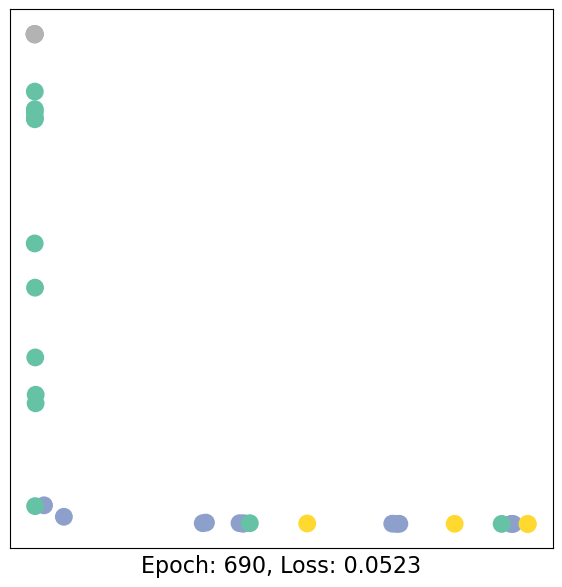

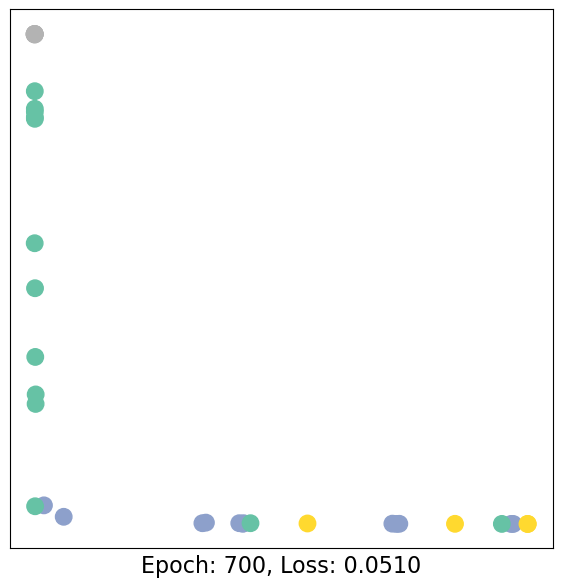

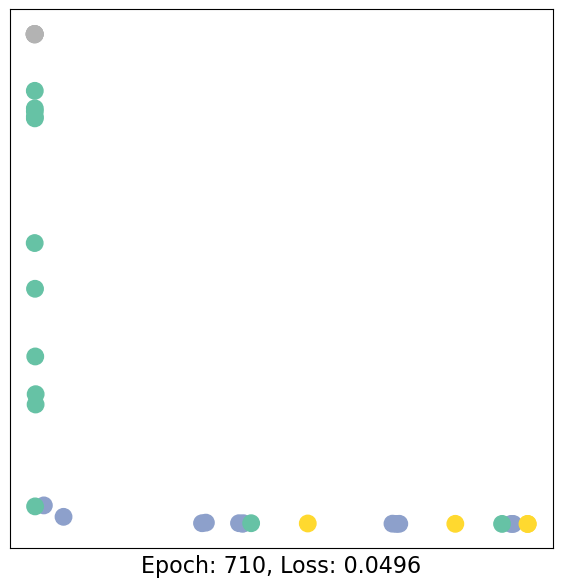

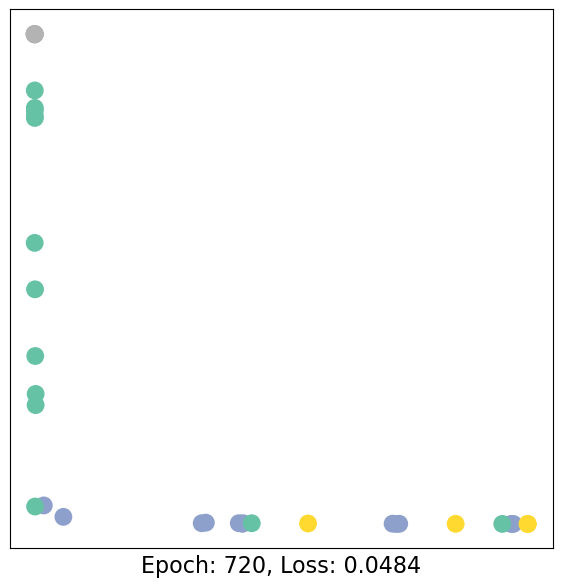

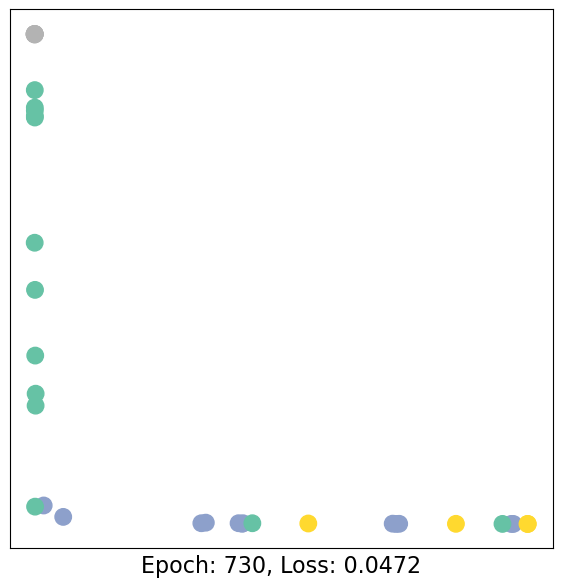

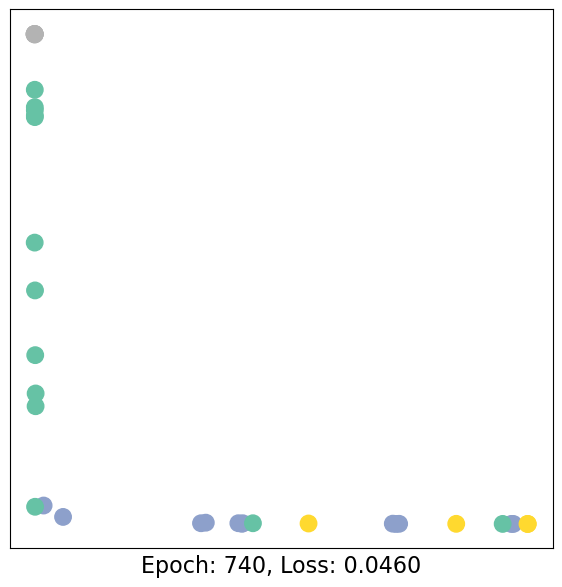

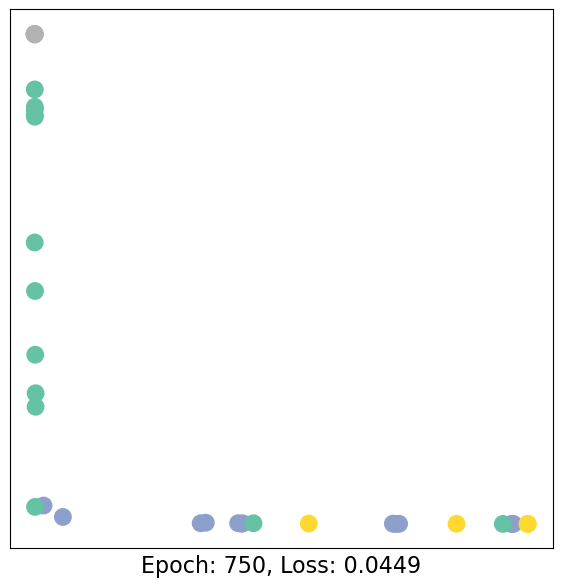

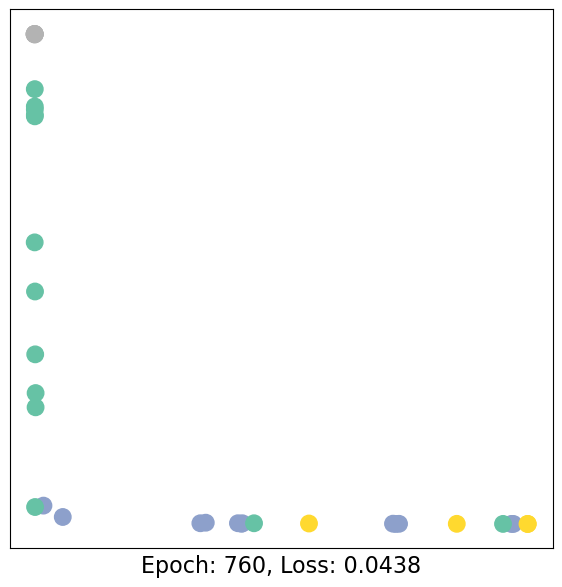

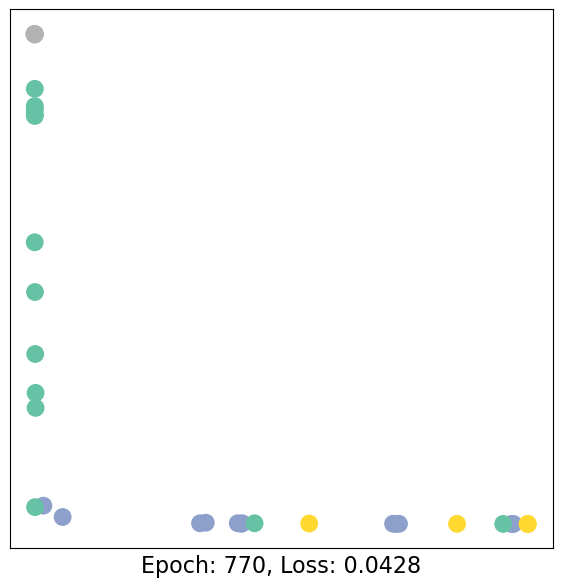

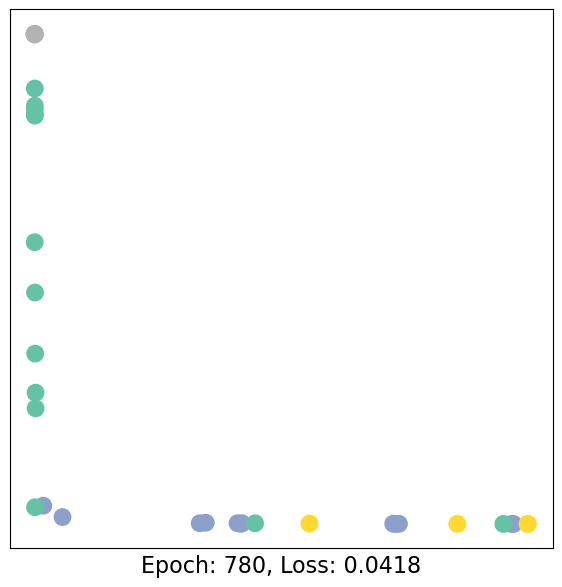

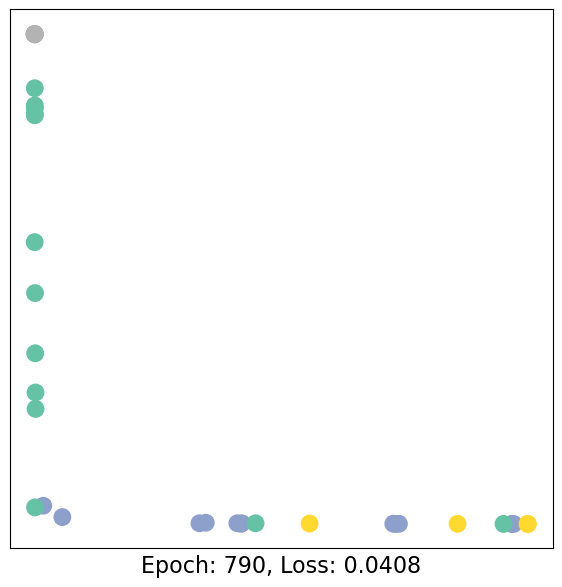

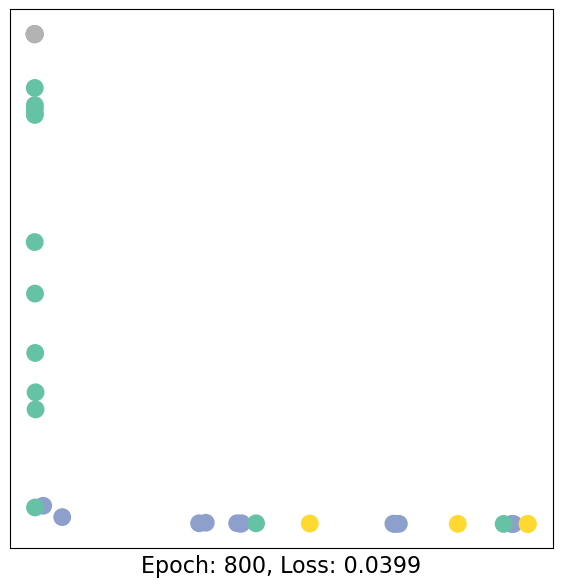

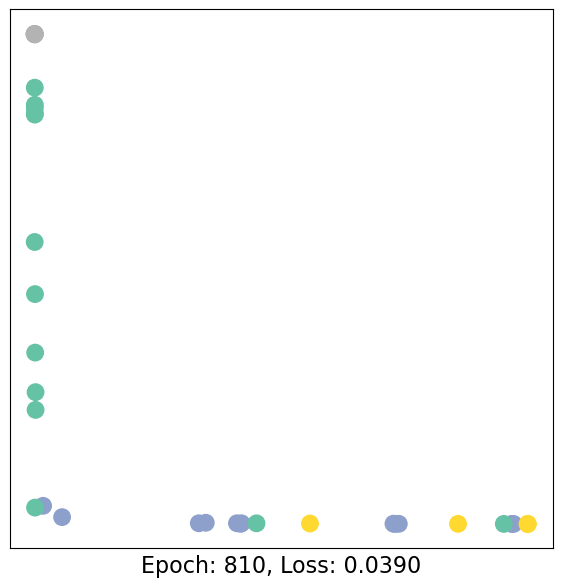

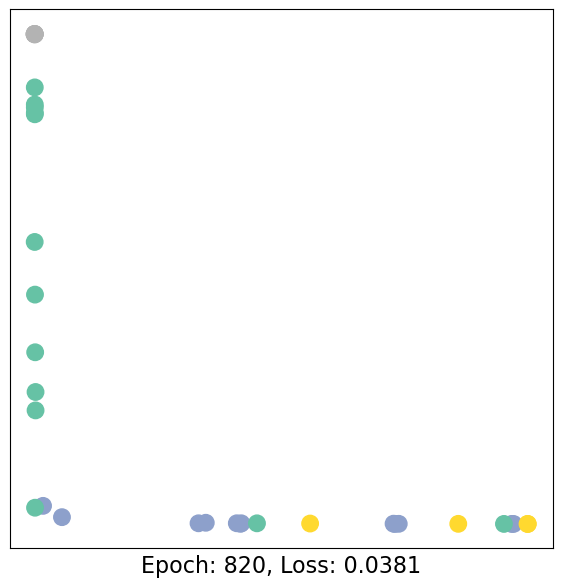

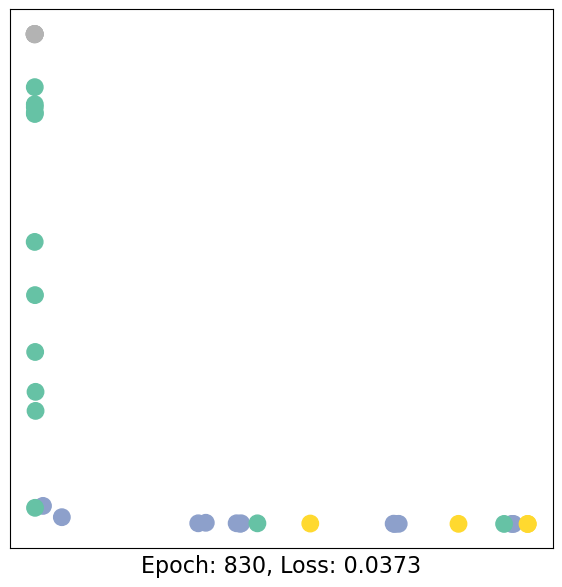

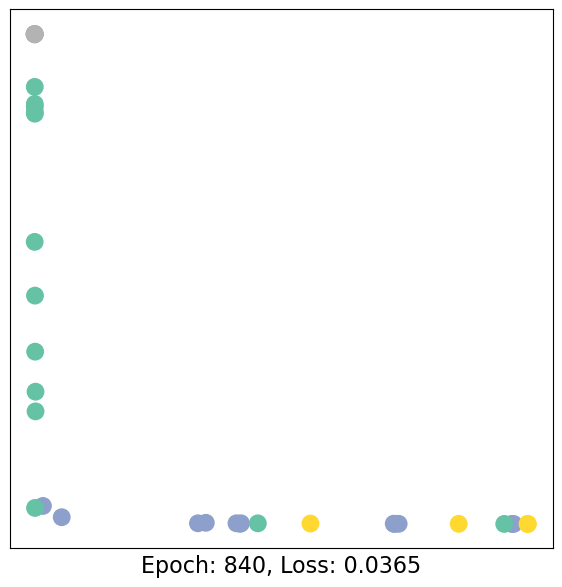

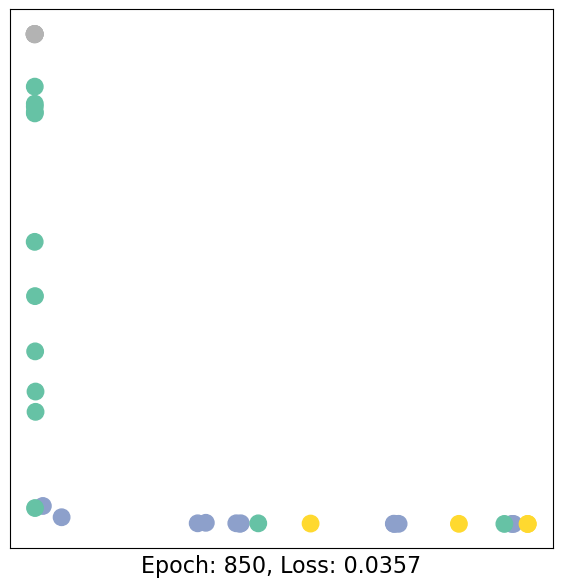

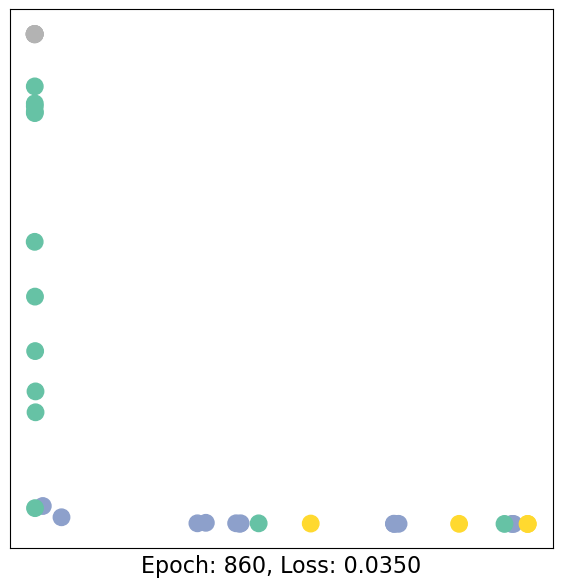

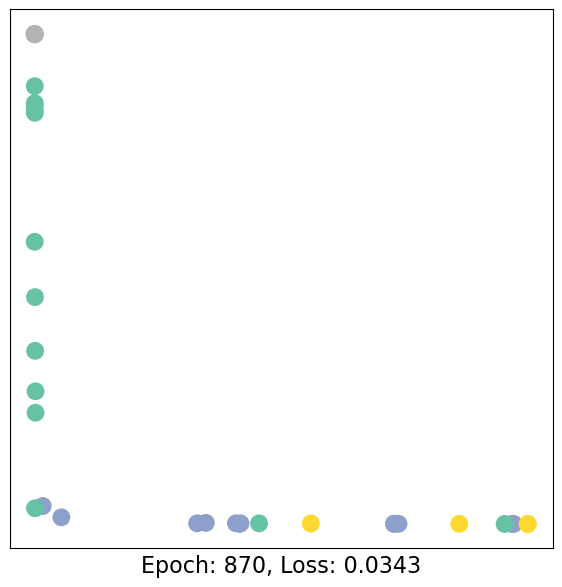

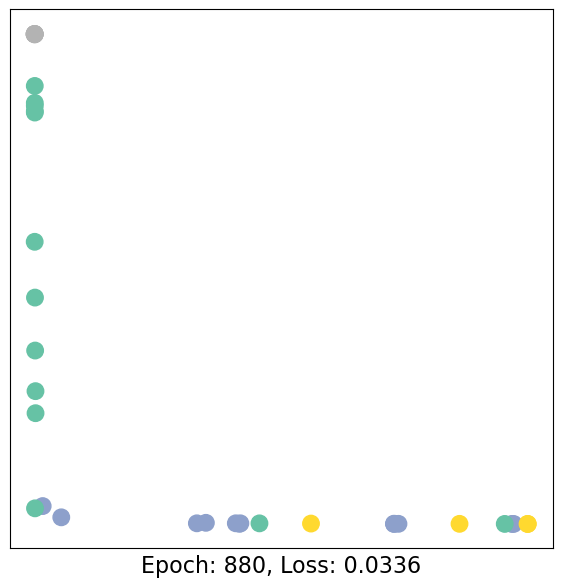

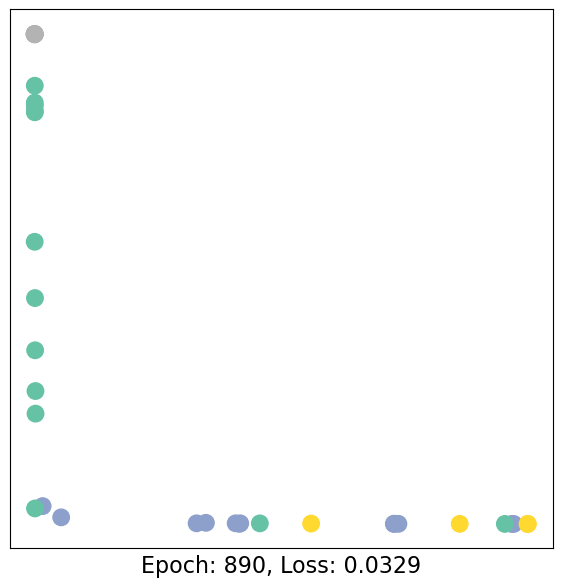

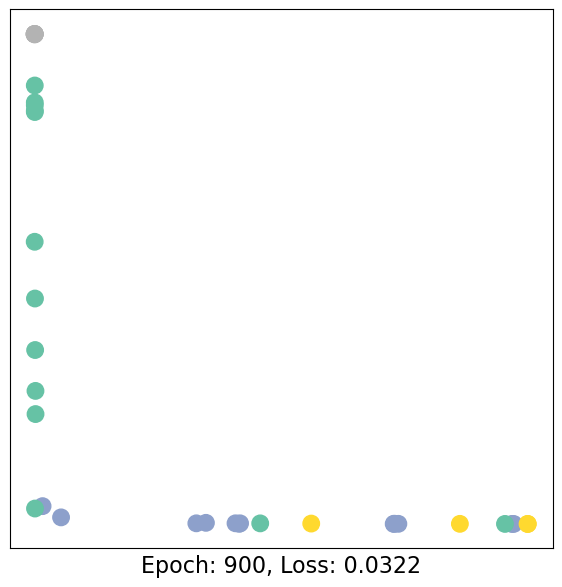

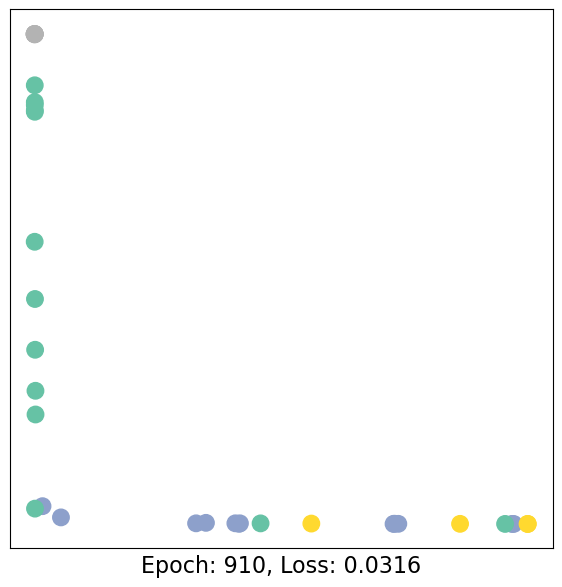

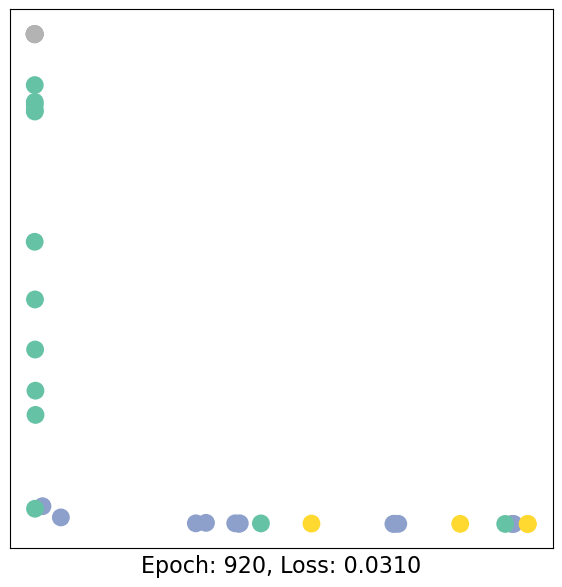

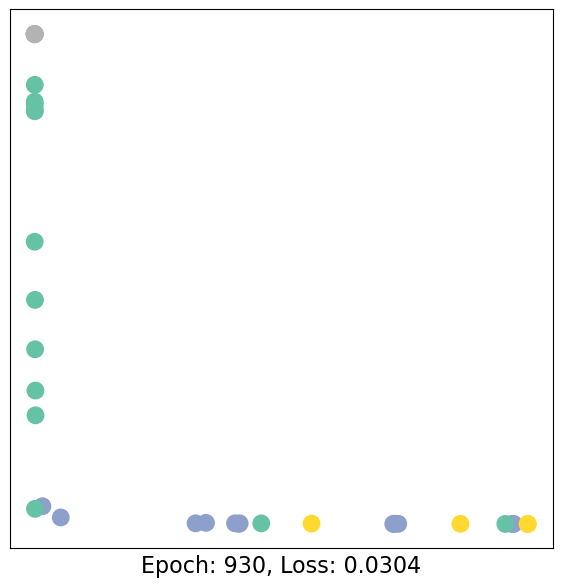

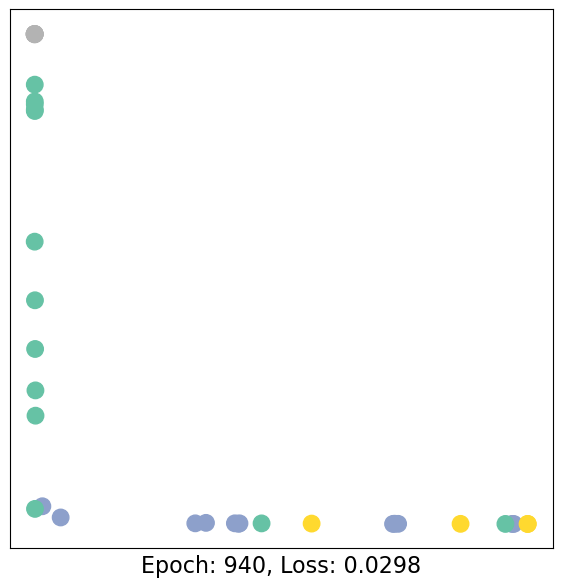

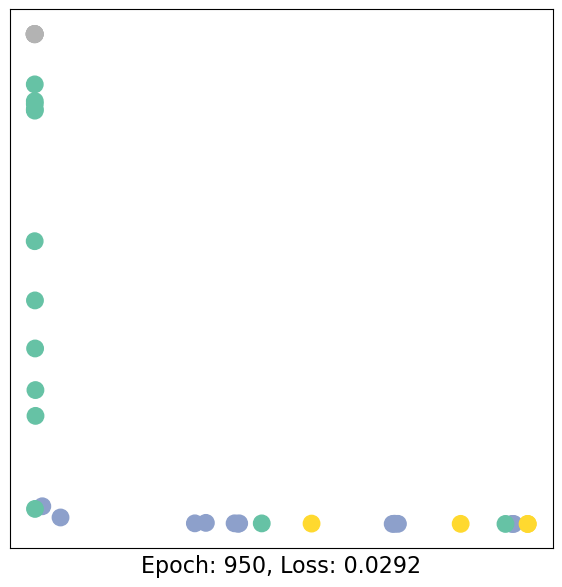

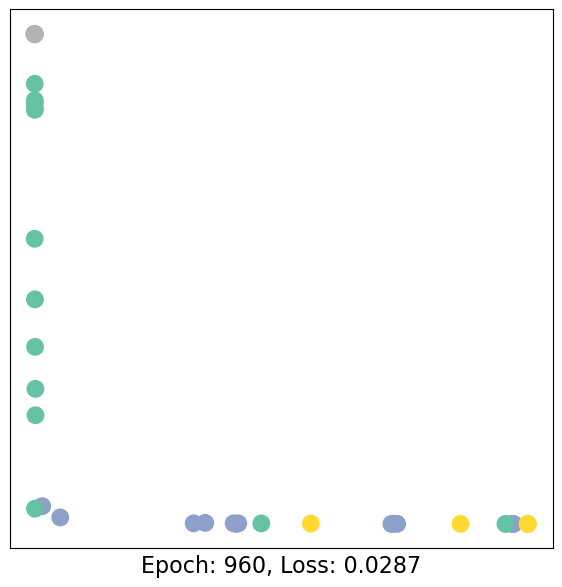

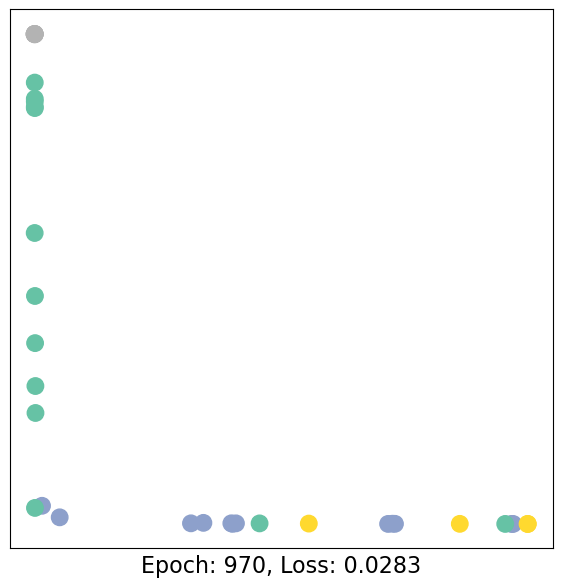

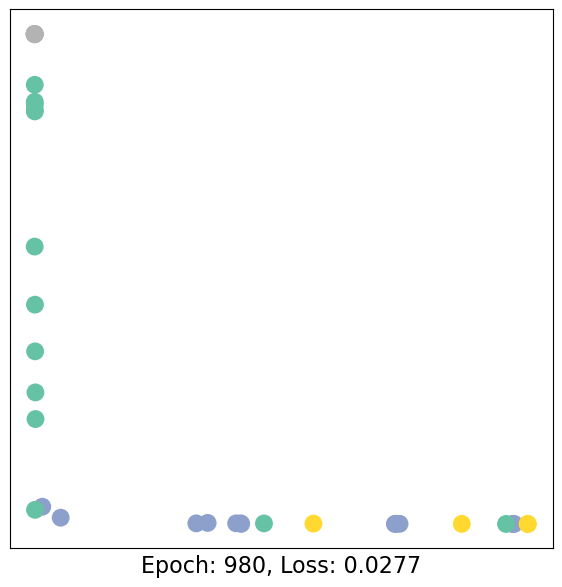

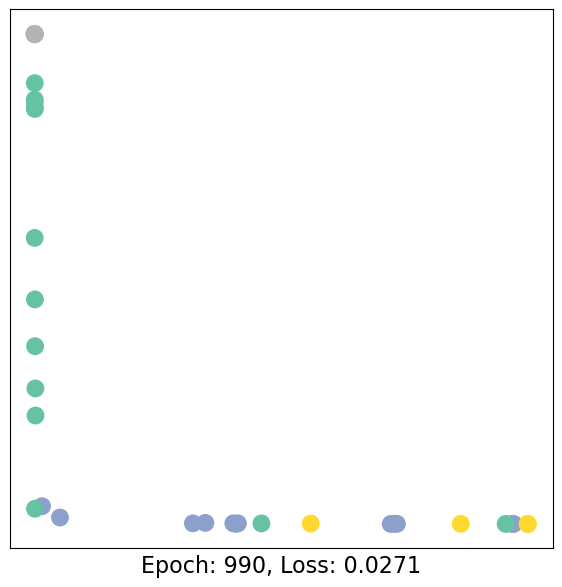

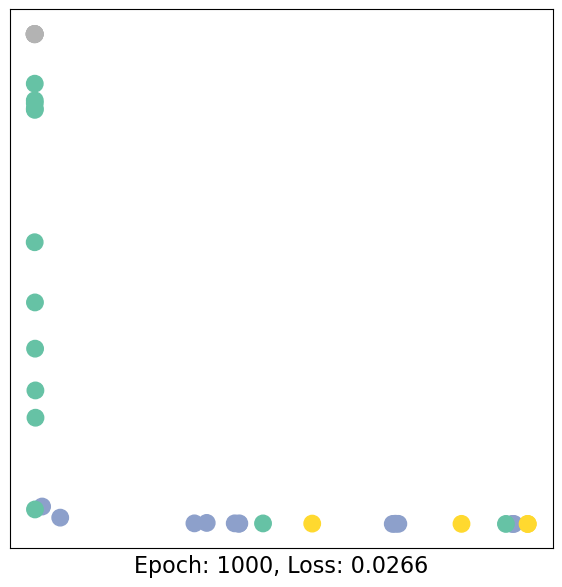

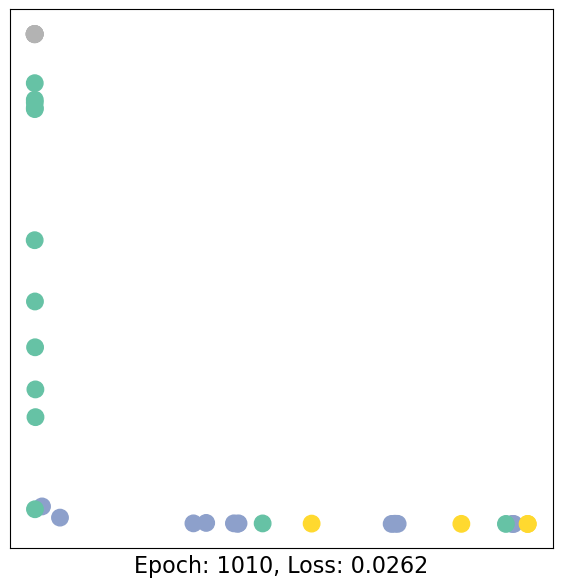

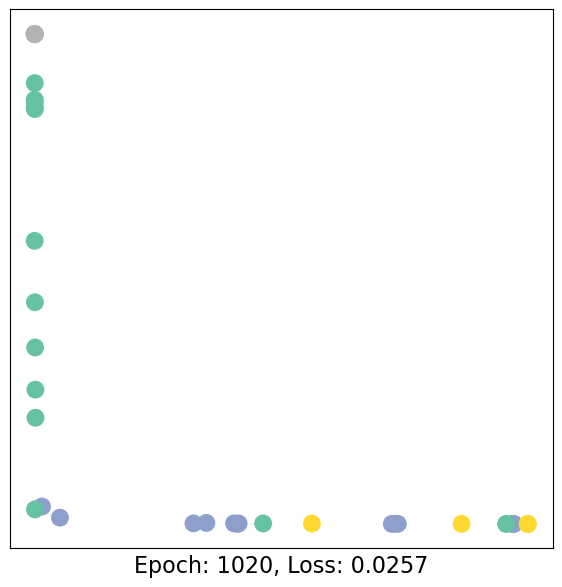

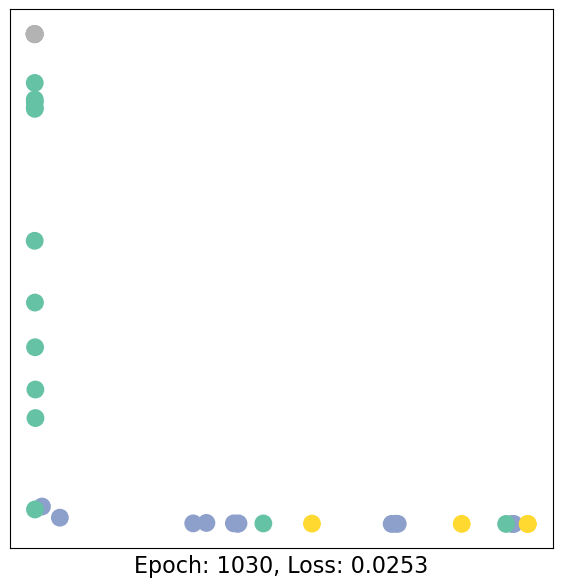

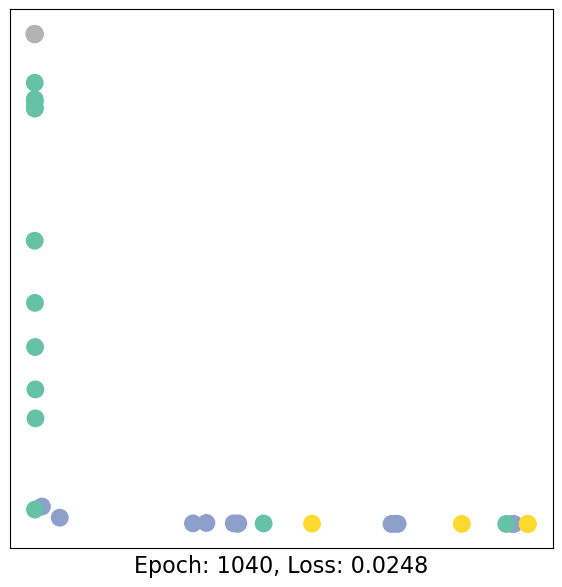

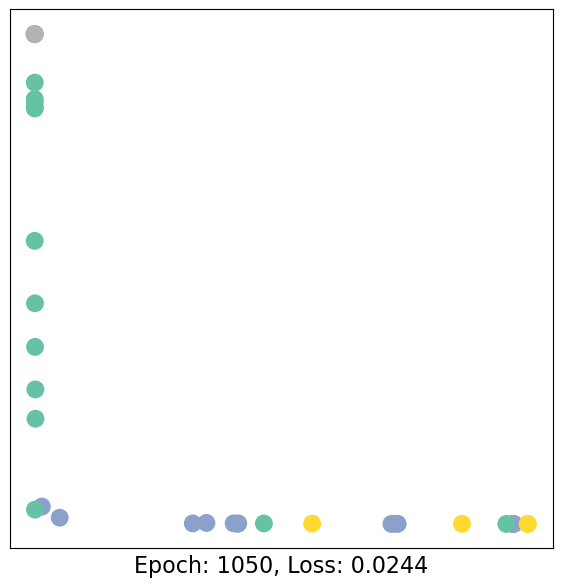

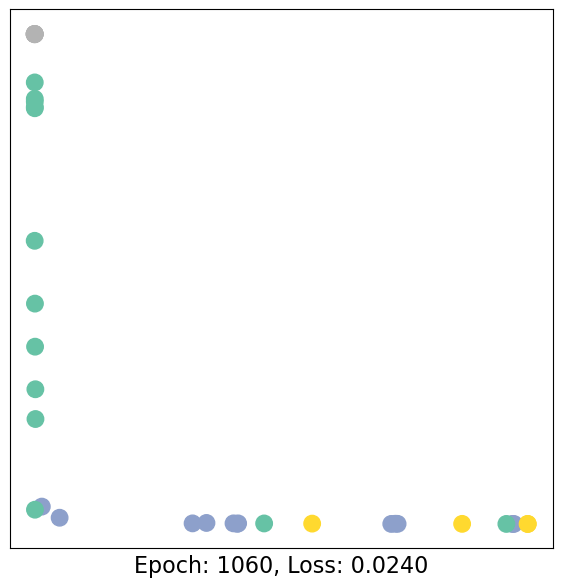

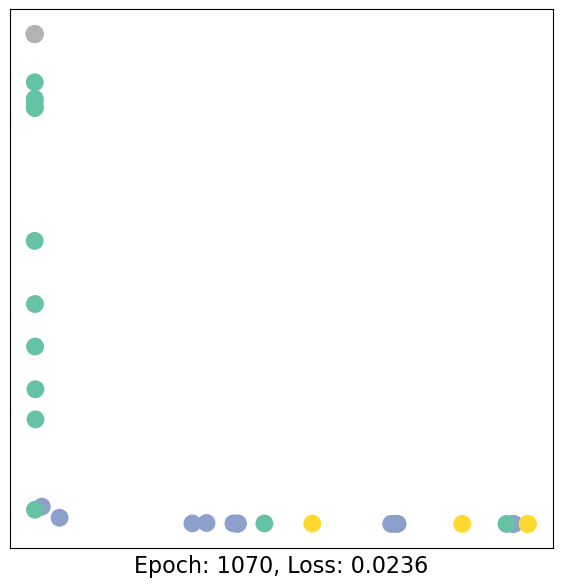

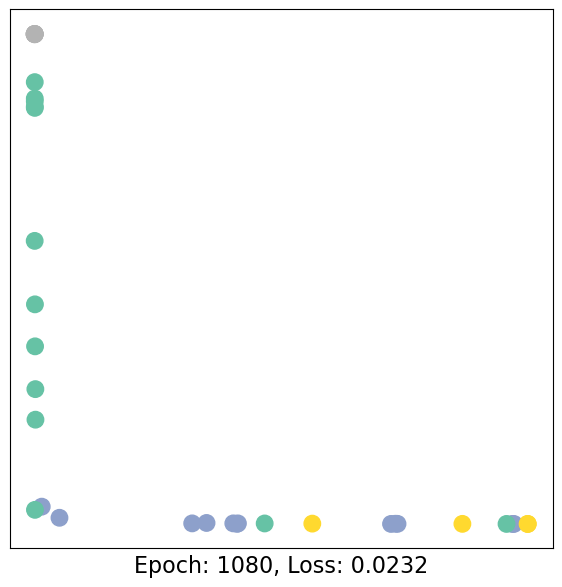

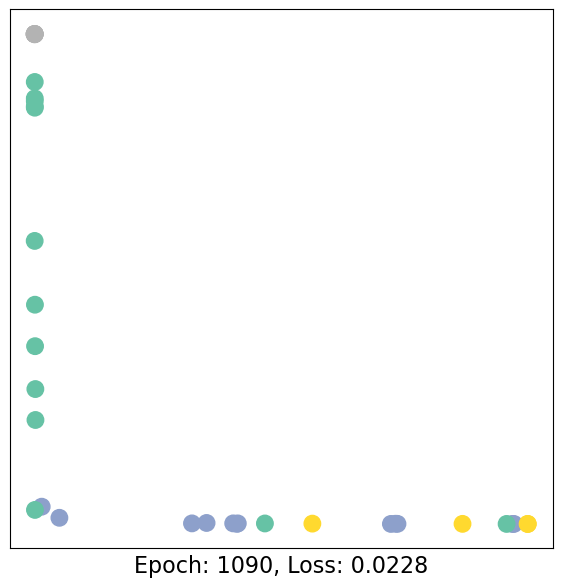

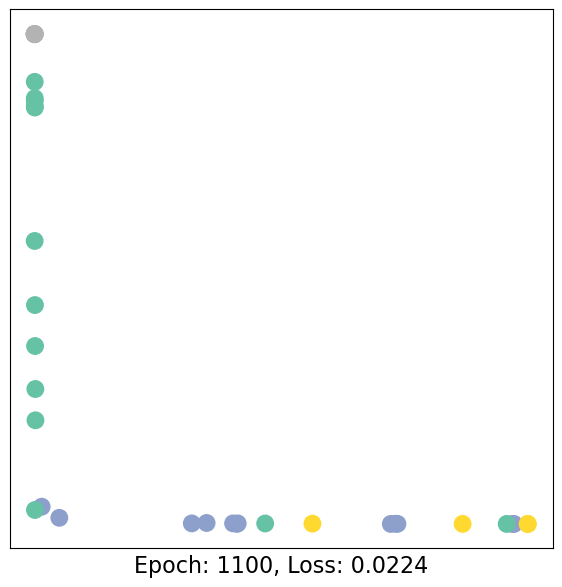

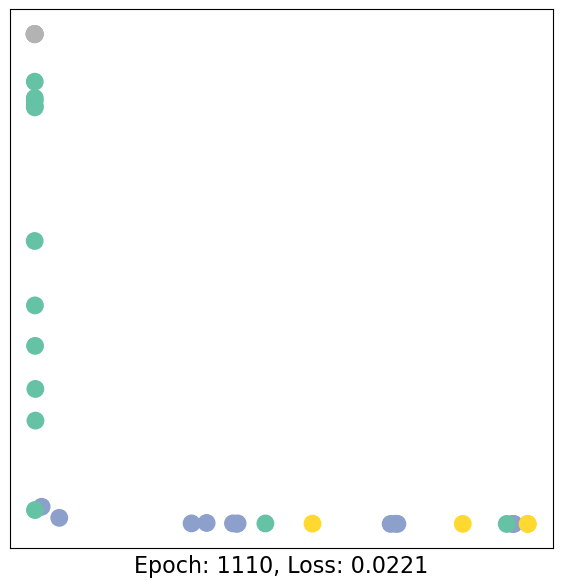

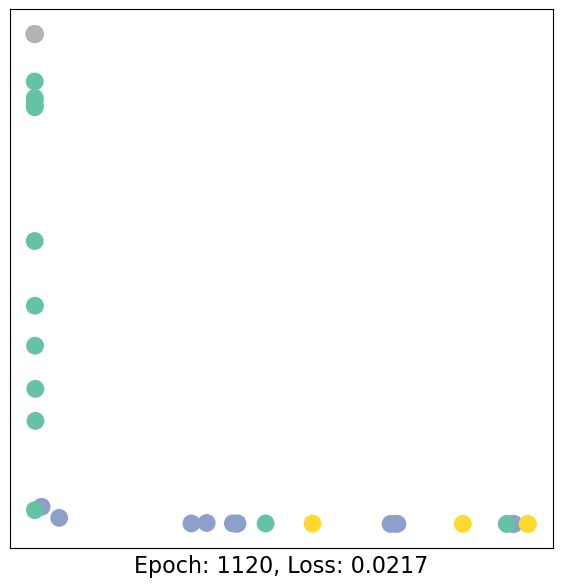

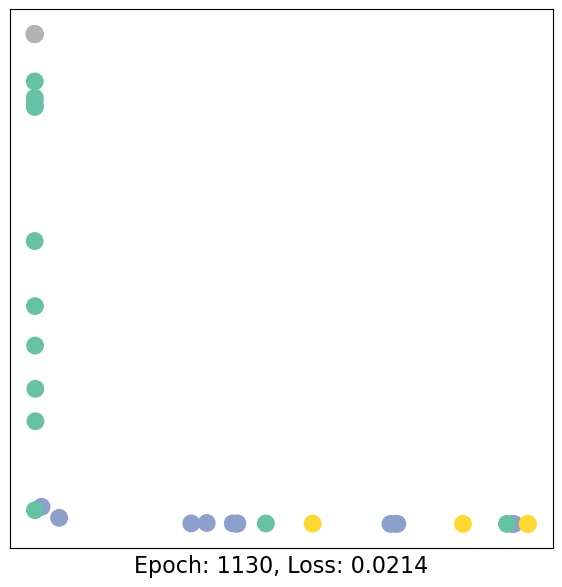

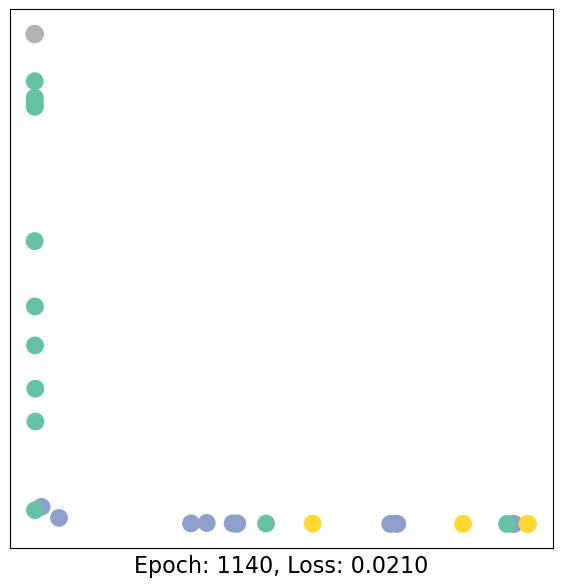

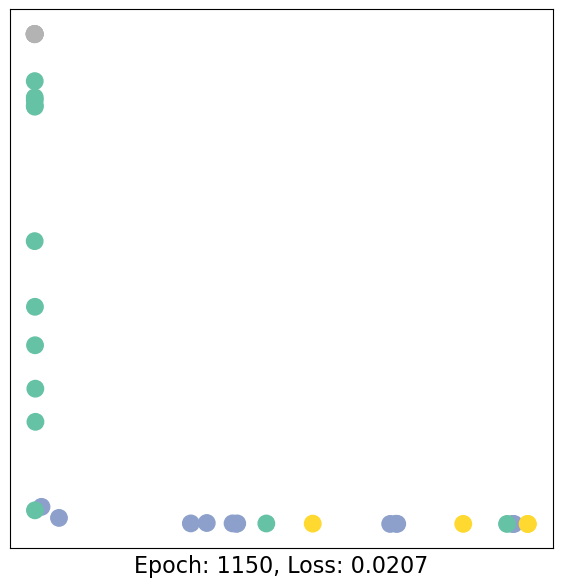

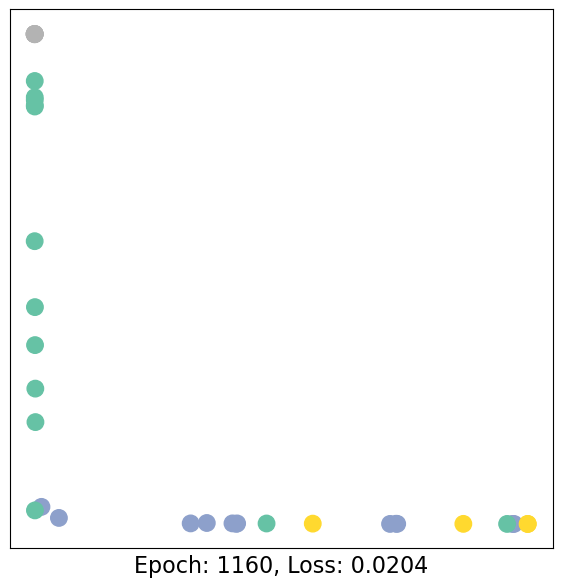

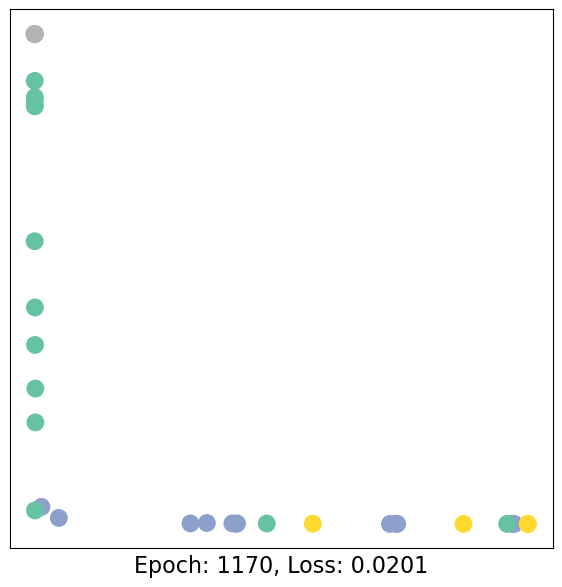

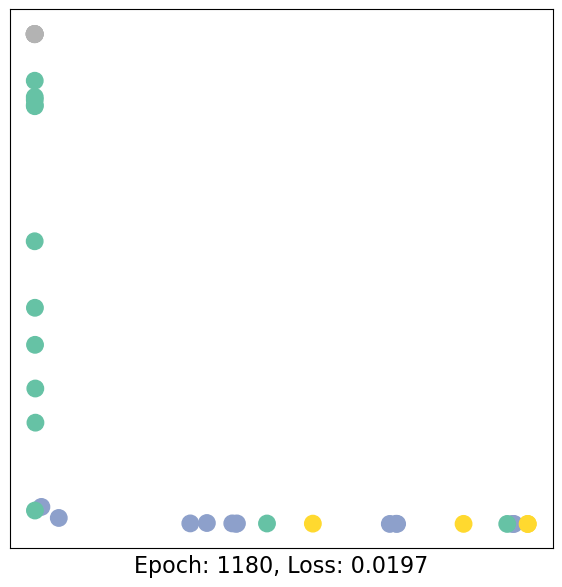

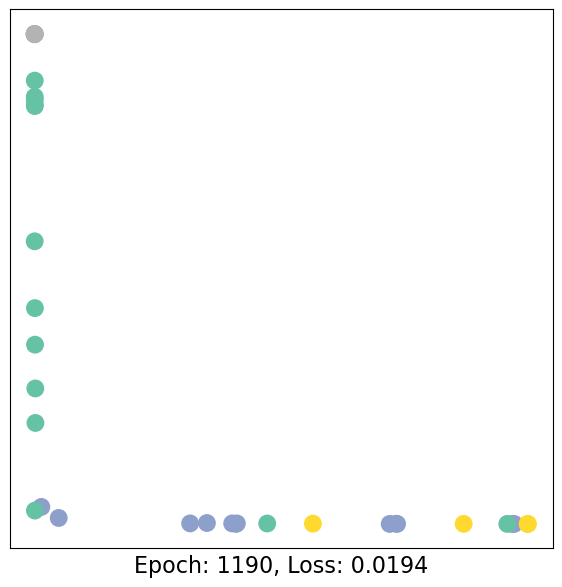

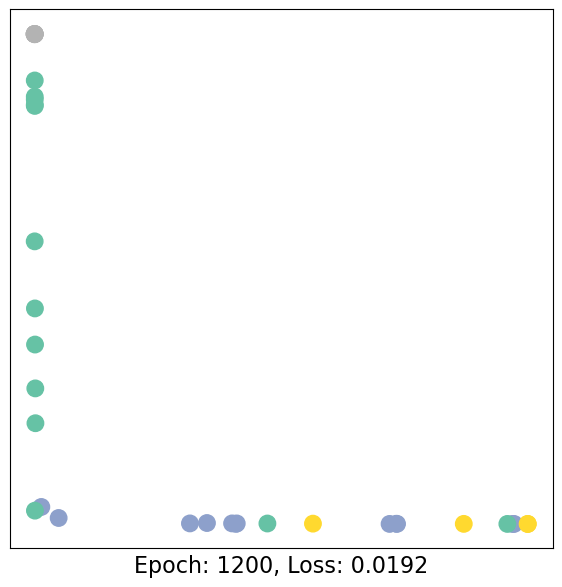

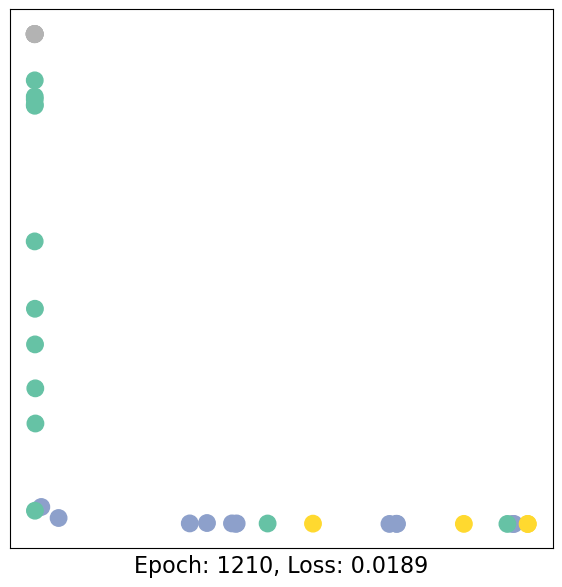

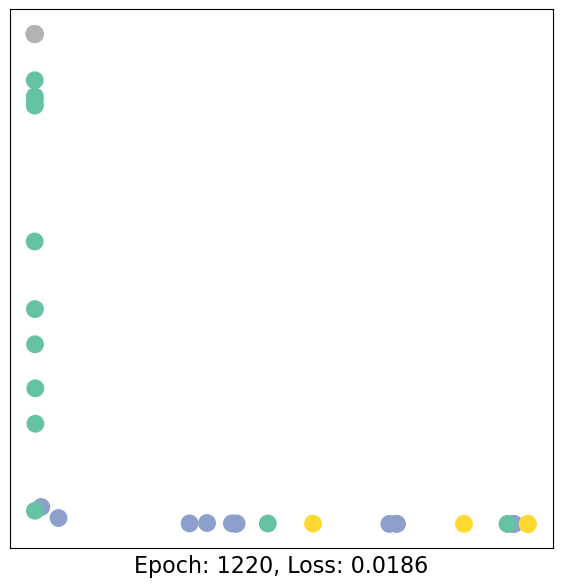

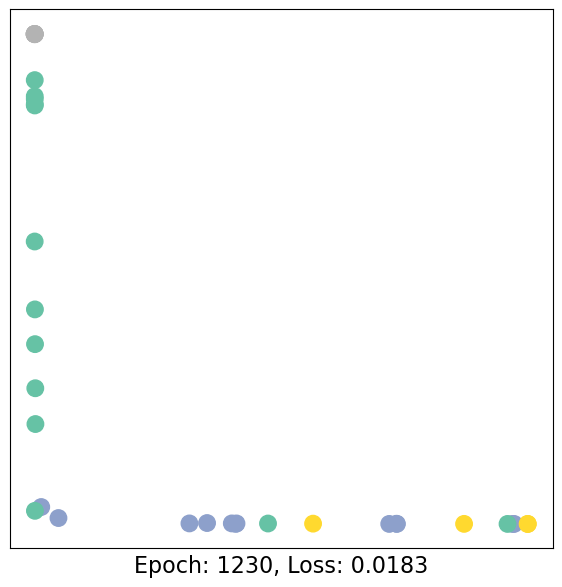

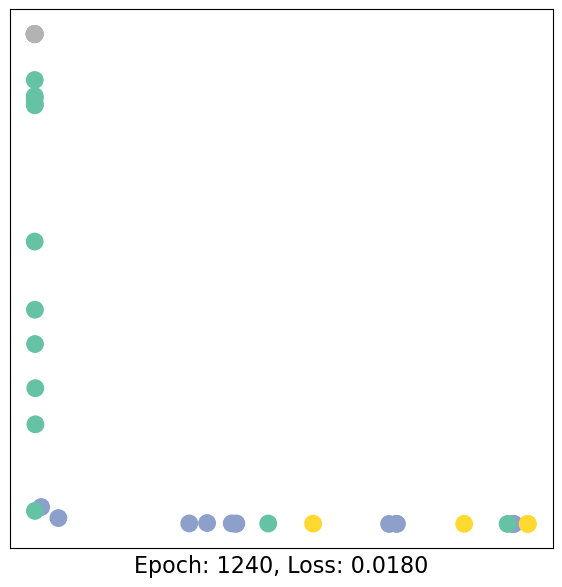

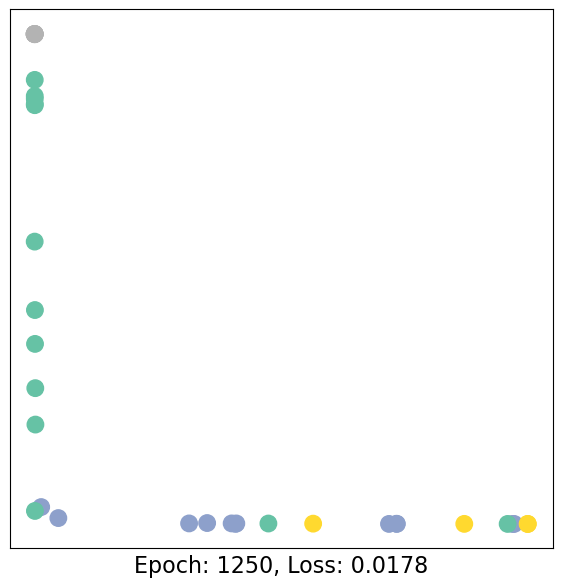

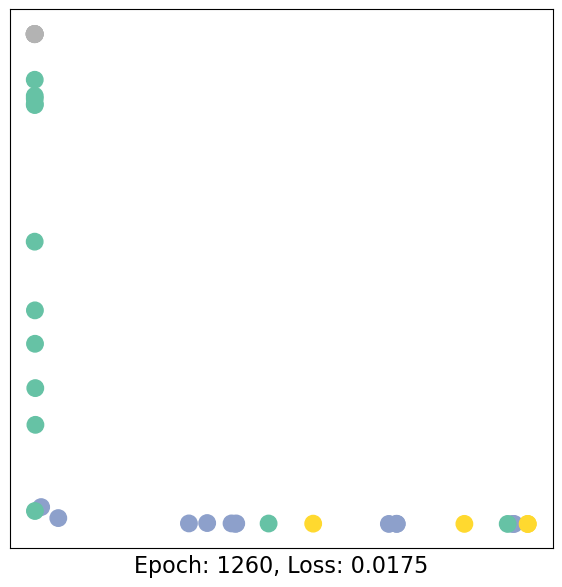

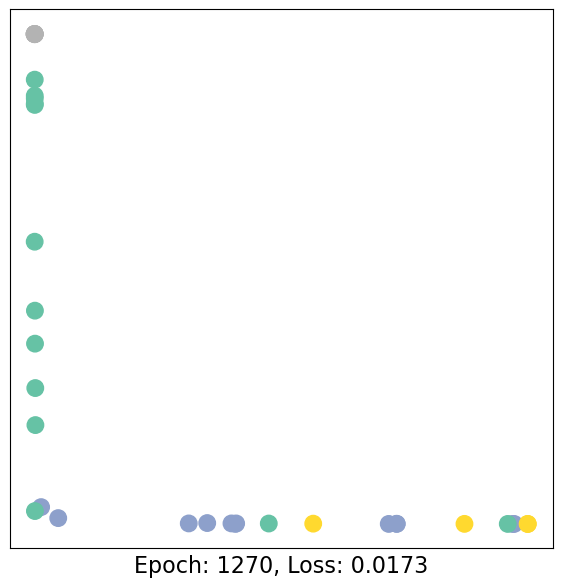

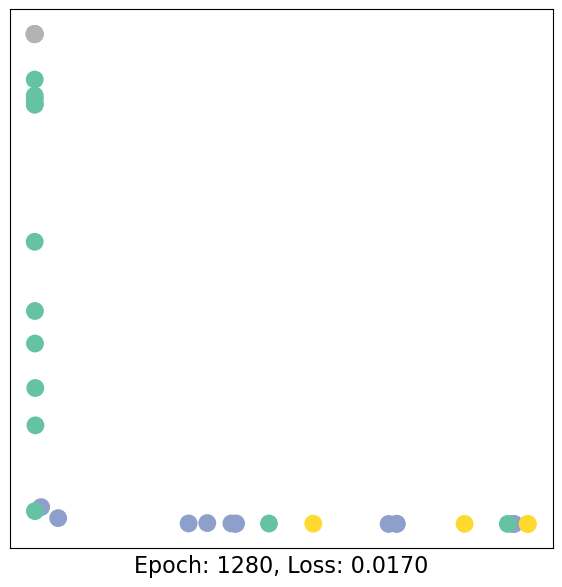

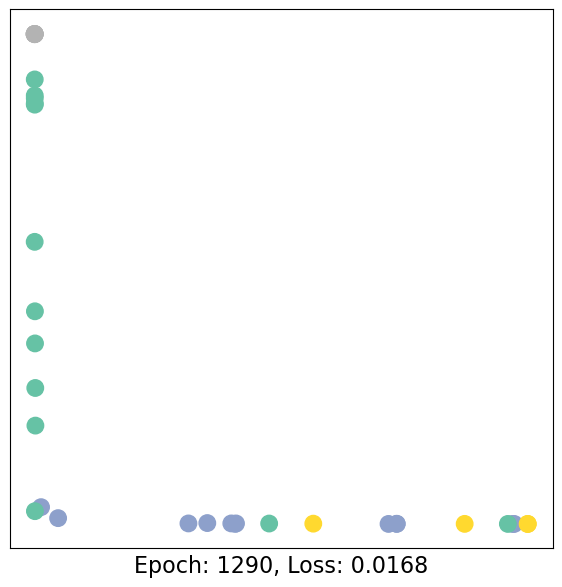

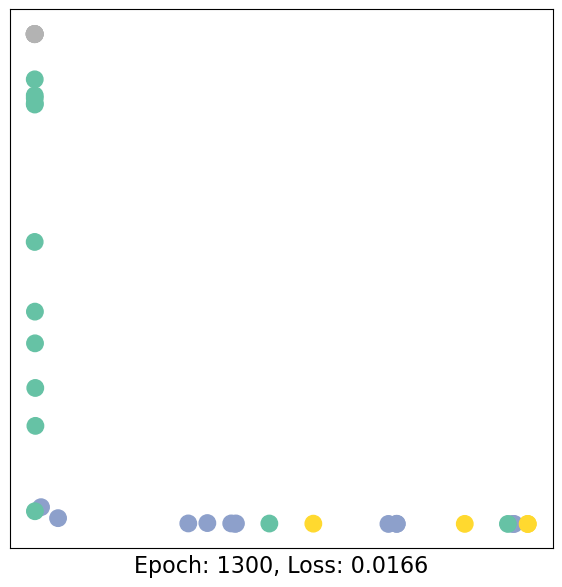

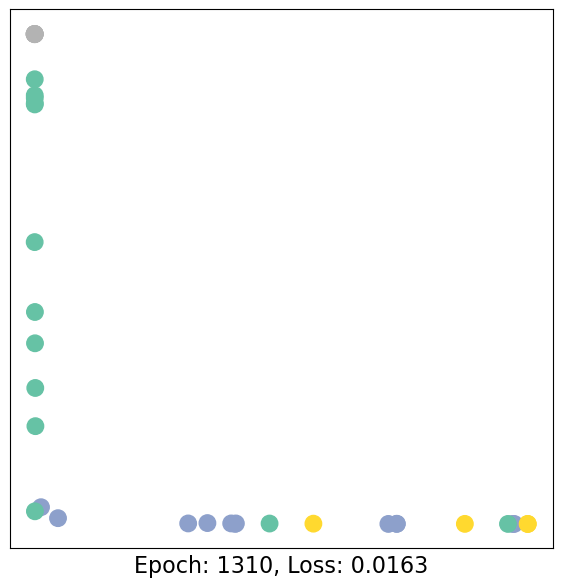

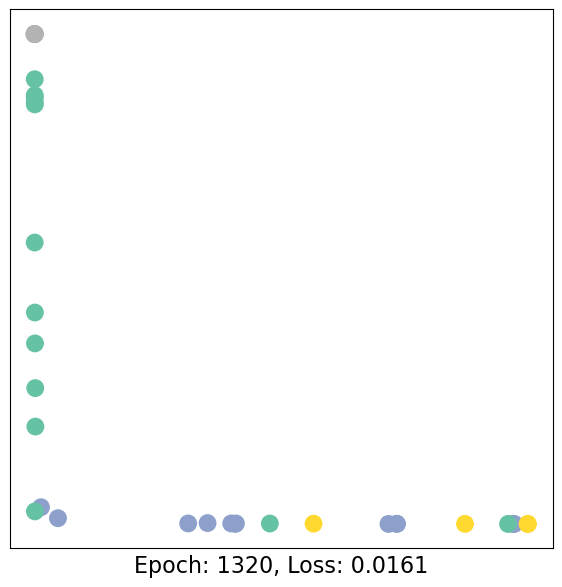

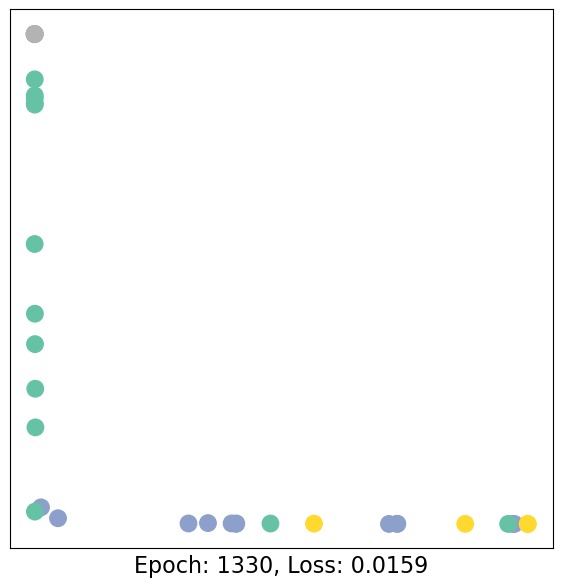

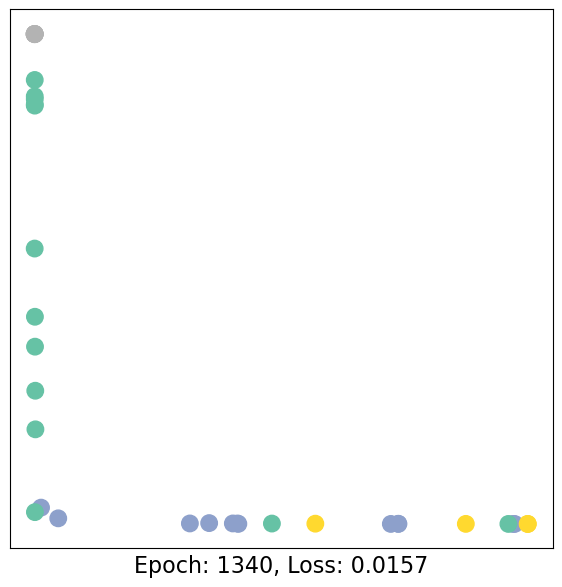

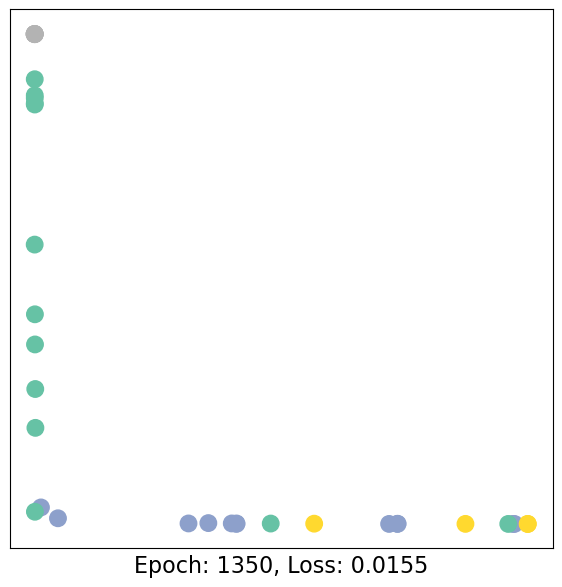

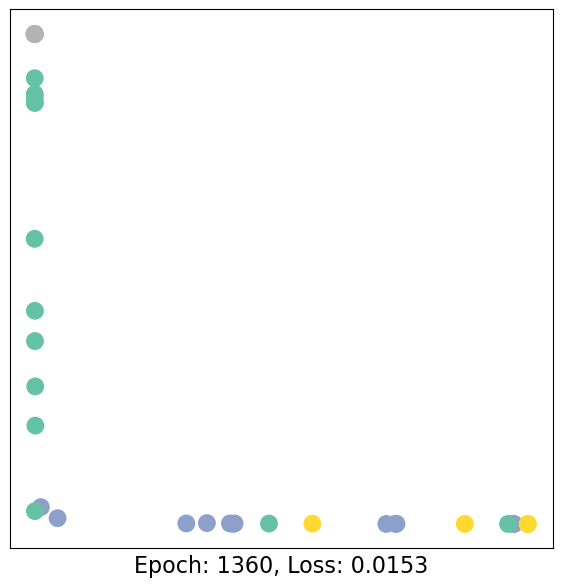

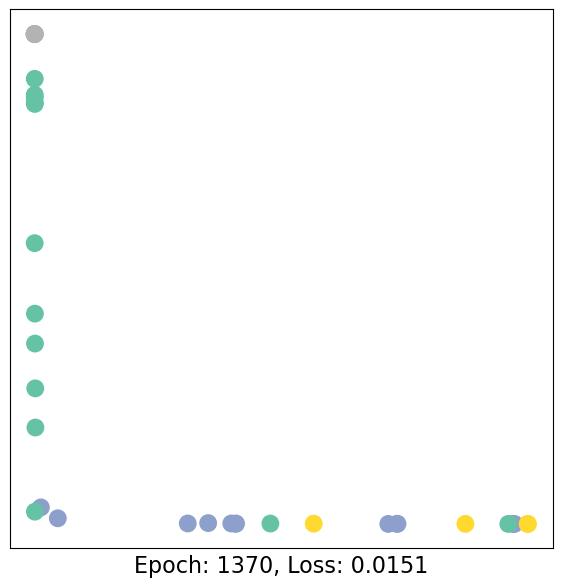

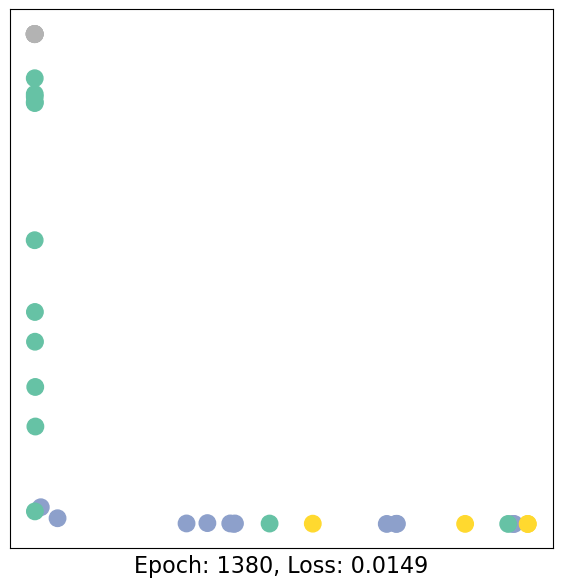

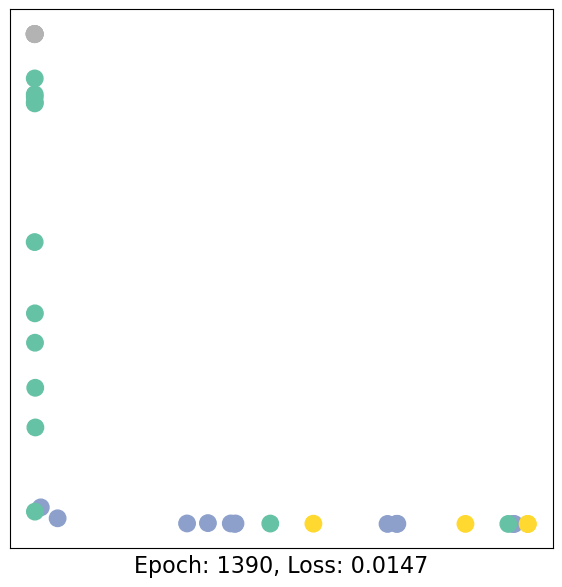

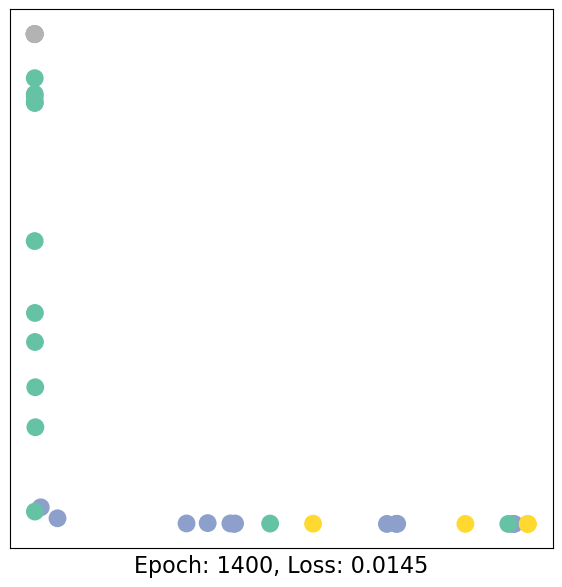

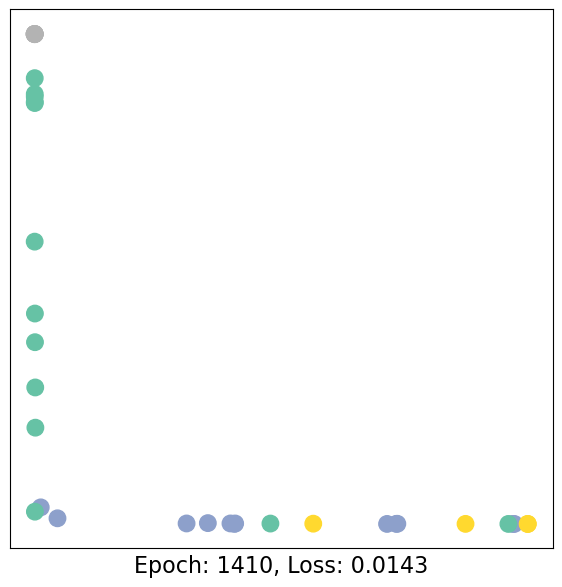

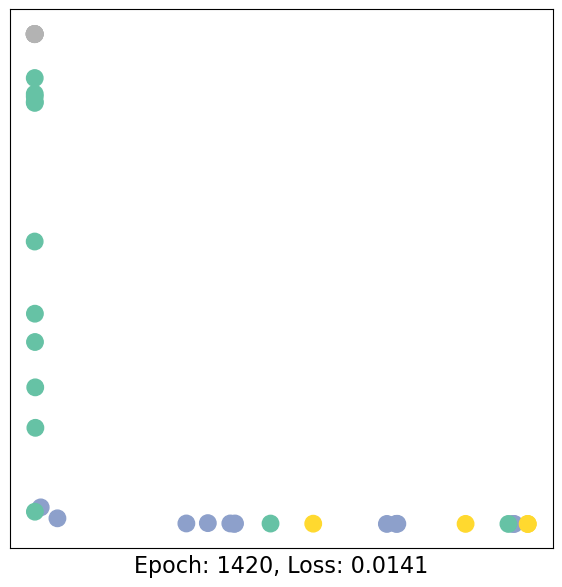

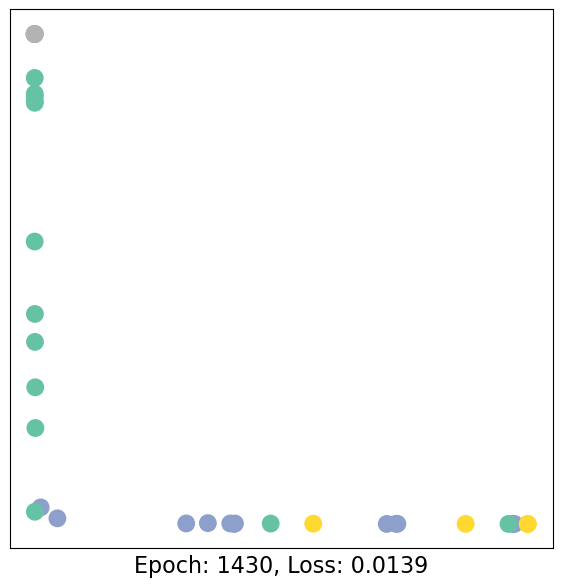

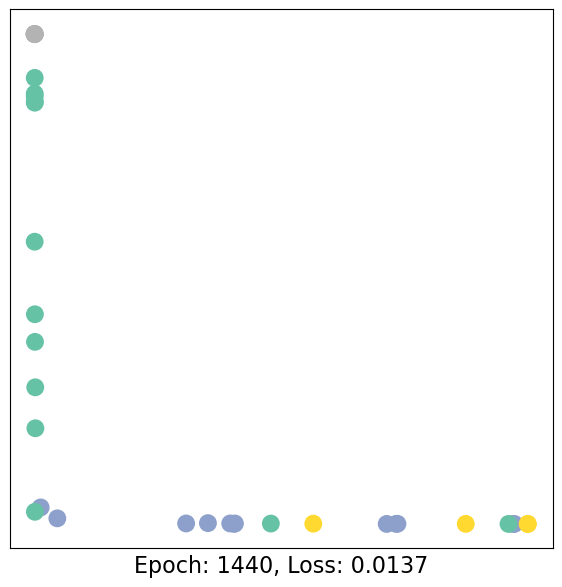

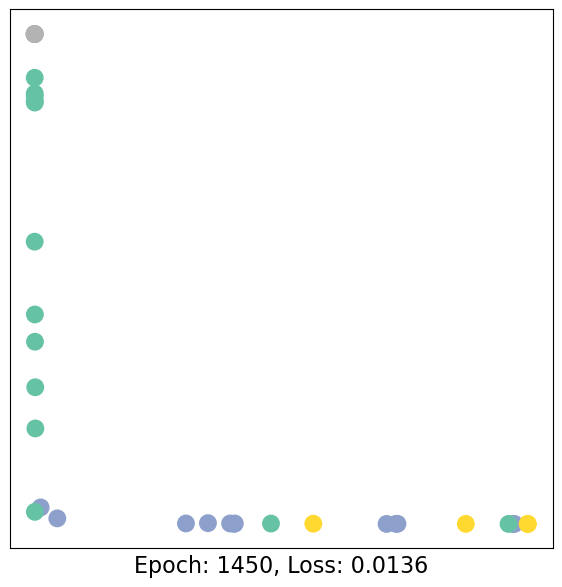

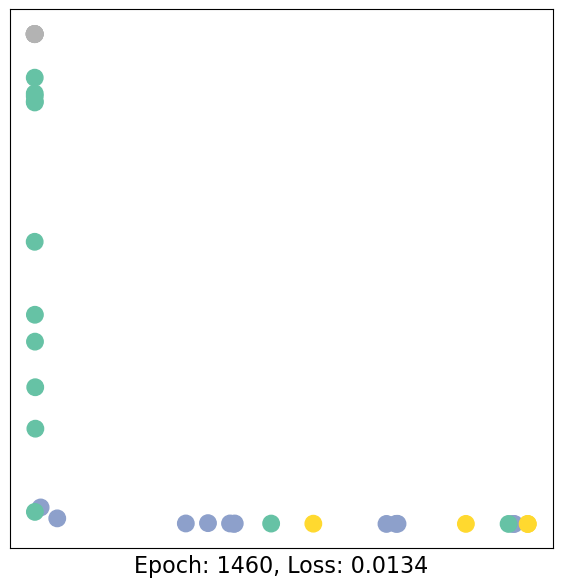

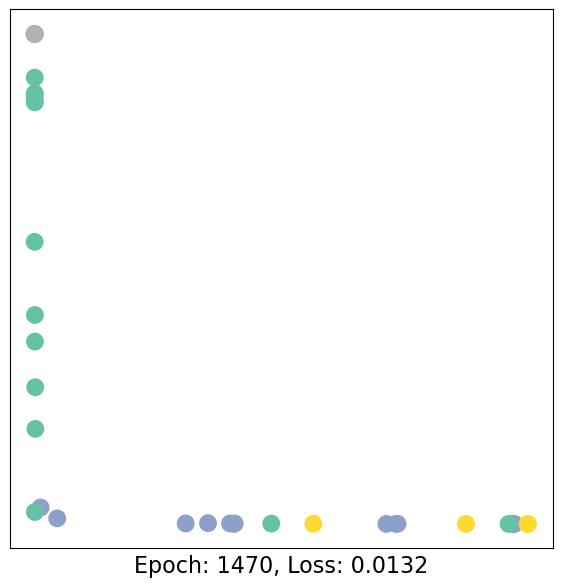

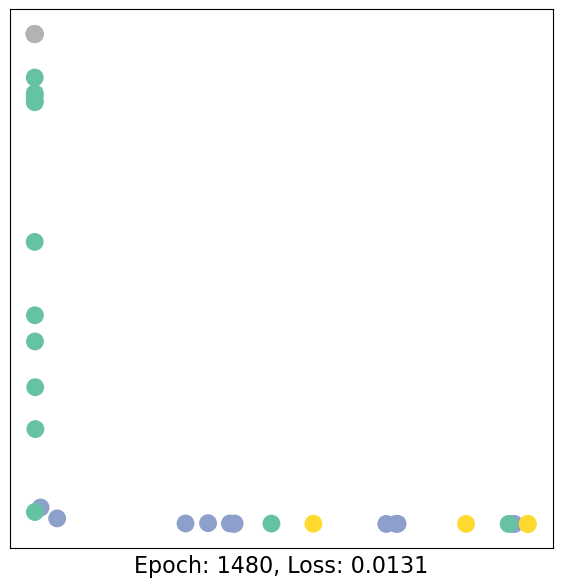

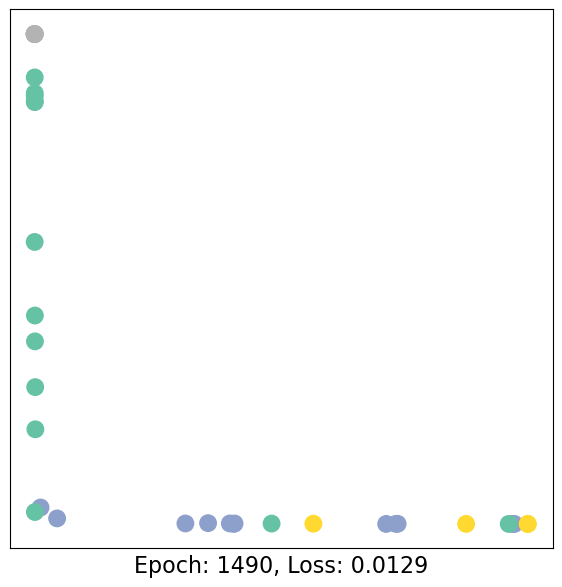

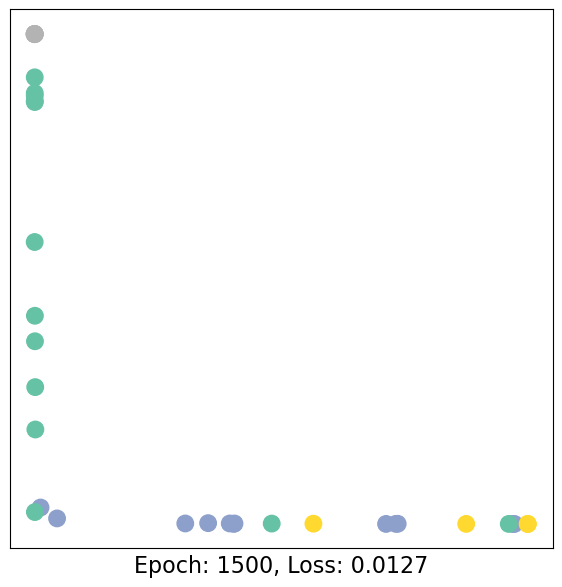

In [26]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(1501):
    loss, h = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

正如我们所看到的，我们的三层 GCN 模型成功地将社区线性分开，并且正确地对大部分节点进行了分类。

此外，所有这些工作都是通过几行代码完成的，这要归功于 PyTorch Geometric 库，它帮助我们处理数据和实现图神经网络。